In [1]:
from emceeFit import *

In [2]:
import time
s = time.time()
#sampler,pos,prob,state,flat_samples = main(True,False,burn=10,iter=300)
main(True,True,burn=1,iter=500)
f = time.time()
print("this cell took {:.2f} min to run".format((f-s)/60))

running with 4 threads
running burn-in


  0%|          | 0/1 [00:00<?, ?it/s]/home/kirk/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1/1 [00:07<00:00,  7.38s/it]


production run (n = 500 iterations)


100%|██████████| 500/500 [1:09:28<00:00,  8.34s/it]


this cell took 71.12 min to run


In [ ]:
samples = sampler.get_chain()
samples[:,0,:]
prob0 = sampler.get_log_prob()
plt.plot(prob0)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys,math

font = {'family' : 'DejaVu Serif',
    'weight' : 'normal',
    'size'   : 16}
plt.rc('font', **font) #set all plot attribute defaults

def pltFormatter(fig,axList,**kwargs):
    for ax in axList:
        ax.minorticks_on()
        ax.grid(b=True,which="major",alpha=0.5)
        ax.grid(b=True,which="minor",alpha=0.3)
        ax.set_xticks([2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.20,2.21,2.22])
        legend=kwargs.get("legend")
        if legend != None:
            legend.get_frame().set_edgecolor('black') 

def trackPercent(place,totalLength,strLen): #percent output tracker
    percent = place/totalLength*100
    if math.floor(percent)==69:
        string="{:.2f} % complete -- nice".format(percent)
    else:
        string="{:.2f} % complete".format(percent)
    sys.stdout.write("\r") #this "moves the cursor" to the beginning of the I0 line
    sys.stdout.write(" "*strLen) #this "clears" whatever was on the line last time by writing whitespace
    sys.stdout.write("\r") #move the cursor back to the start again
    sys.stdout.write(string) #display the current percent we are at
    sys.stdout.flush() #flush finishes call to print() (this is like what's under the hood of print function)
    strLen=len(string) #return the new string length for next function call
    return strLen

In [3]:
SummitResults = readPickle('jPyPTEmceeVar.p')
localResults = readPickle('jPyEmceeVar.p')
#jResults = readPickle('jPyEmceeVarHighi.p')
#SummitResults = readPickle('summitGoodLogVar2.p')
flat_samples,pos,prob,lhood,acor = SummitResults
#flat_samples,pos,prob = localResultsdef
#flat_samples,pos,prob = jResults
getProfiles = DiskWind.getProfiles
# len(flat_samples[0]) #should be 10 now
len(flat_samples[0,0,:])# tempered way, extra dimension (1st) for different temps

summit0 = readPickle('jPyPTEmceeVar0.p'); summit1 = readPickle('jPyPTEmceeVar1.p'); summit2 = readPickle('jPyPTEmceeVar2.p'); summit3 = readPickle('jPyPTEmceeVar3.p')
summit4 = readPickle('jPyPTEmceeVar4.p'); summit5 = readPickle('jPyPTEmceeVar5.p'); summit6 = readPickle('jPyPTEmceeVar6.p'); summit7 = readPickle('jPyPTEmceeVar7.p')
summit8 = readPickle('jPyPTEmceeVar8.p'); summit9 = readPickle('jPyPTEmceeVar9.p'); summit10 = readPickle('jPyPTEmceeVar10.p'); summit11 = readPickle('jPyPTEmceeVar11.p')
summit12 = readPickle('jPyPTEmceeVar12.p'); summit13 = readPickle('jPyPTEmceeVar13.p');
#summit8 = readPickle('jPyPTEmceeVar8.p')
# def getAllResults(n): --- can't figure this out wtf
#     pickled = []
#     for i in range(n):
#         pickled.append(readPickle("jPyPTEmceeVar{}.p".format(i)))
#     allResults = [np.concatenate((*pickled[i]),axis=1) for i in range(5)]
#     return allResults

allResults = [np.concatenate((summit0[i],summit1[i],summit2[i],summit3[i],summit4[i],
                              summit5[i],summit6[i],summit7[i],summit8[i],summit9[i],
                             summit6[i],summit7[i],summit8[i],summit9[i],summit10[i],
                             summit11[i],summit12[i],summit13[i]),axis=1) for i in range(len(summit0))]
flat_samples,pos,prob,lhood,acor = allResults
np.max(acor[0]*100) #how long we should iterate for to ensure convergence, need 4 runs of 2500 iterations
for i in range(11):
    print(acor[0][14*i:14*(i+1)],"\n")

[91.25337619 91.53780142 90.90713569 84.7077774  69.37060018 89.94696644
 85.03988164 72.03775178 86.54100693 50.35868063 75.30034598 38.67913354
 33.73145652 16.53910571] 

[39.00586314 45.57591249 54.4843478  28.96449744 48.81767478 39.22149547
 26.02795841 55.62105005 32.54438841 26.58310752  8.51134015 41.49928013
 46.19844093 39.50128807] 

[30.75384467 42.89547601 49.15013291 28.73259777 51.5335642  26.34495338
 24.1281525  21.7409491  30.2516875  33.7942526  23.58623689 34.82627885
 22.74869576 34.01504625] 

[19.00435801 33.27021547 34.20136322 29.81728769 23.06781001 50.73299571
 60.34367715 58.64805695 51.47315673 52.42862307 59.47049728 37.88081758
 62.07393254 58.97755753] 

[42.40913907 26.96699202 37.53461691 28.03498104 54.33239218 49.88671747
 47.44222161 53.71042651 29.11337802 65.2768125  28.53284502 19.78674335
  9.11490343 33.37275607] 

[59.1908516  57.40629175 36.78848727 34.0226954  48.23998737 35.74899685
 44.79740759 54.38787746 26.41489102 35.70135474 36.79529

In [144]:
flat_samples,pos,prob = localResults
T1Walkers=flat_samples.reshape(500,24,11)
#T1Walkers[0,1,:]-T1Walkers[0,0,:]
T1Walkers[0,8,:]
probWalkers=prob.reshape(500,24)
T1Walkers[0,0,:]-T1Walkers[1,0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
#Walker animation
fontFac=1.5
SMALL_SIZE = 8*fontFac
MEDIUM_SIZE = 10*fontFac
BIGGER_SIZE = 12*fontFac

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")

cList=["crimson"]; labelList=["MCMC Walker"]; alphaList=[0.7,0.7,1.]
frameNum=0
for i in range(500): #make 100 frame test
    if i%25==0:
        print("at i = {}/300".format(i))
    probi=probWalkers[i,0]
    if probi != -np.inf:
        fig,ax1,ax2,ax3=plotParams(data,[T1Walkers[i,0,:]],1.,cList,labelList)
        frameNum+=1
        fig.savefig('tmpPlots2/test_{:03d}.png'.format(frameNum))
        plt.close("all")

at i = 0/300
100.00 % completeat i = 25/300
100.00 % completeat i = 50/300
100.00 % completeat i = 75/300
100.00 % completeat i = 100/300
100.00 % completeat i = 125/300
100.00 % completeat i = 150/300
100.00 % completeat i = 175/300
100.00 % completeat i = 200/300
100.00 % completeat i = 225/300
100.00 % completeat i = 250/300
100.00 % completeat i = 275/300
100.00 % completeat i = 300/300
100.00 % completeat i = 325/300
100.00 % completeat i = 350/300
100.00 % completeat i = 375/300
100.00 % completeat i = 400/300
100.00 % completeat i = 425/300
100.00 % completeat i = 450/300
100.00 % completeat i = 475/300
100.00 % complete

In [150]:
# for θ in flat_samples[np.random.randint(len(flat_samples), size=10)]:
#     print("i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2 1) = {4:.2f}, f2 (sin^2 2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, f4 (cos^2) = {7:.2f}".format(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7]))
for θ in flat_samples[-1][np.random.randint(len(flat_samples), size=10)]:
    print("i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2 1) = {4:.2f}, f2 (sin^2 2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, f4 (cos^2) = {7:.2f}".format(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7]))

i = 86.99, rMin = 4695.11, MFac = 0.72, rFac = 35.96, f1 (sin^2 1) = 0.69, f2 (sin^2 2) = 0.97, f3 (sin*cos)= 0.82, f4 (cos^2) = 0.30
i = 86.99, rMin = 4695.11, MFac = 0.72, rFac = 35.96, f1 (sin^2 1) = 0.69, f2 (sin^2 2) = 0.97, f3 (sin*cos)= 0.82, f4 (cos^2) = 0.30
i = 87.38, rMin = 4710.37, MFac = 0.72, rFac = 36.09, f1 (sin^2 1) = 0.69, f2 (sin^2 2) = 0.97, f3 (sin*cos)= 0.82, f4 (cos^2) = 0.30
i = 87.38, rMin = 4710.37, MFac = 0.72, rFac = 36.09, f1 (sin^2 1) = 0.69, f2 (sin^2 2) = 0.97, f3 (sin*cos)= 0.82, f4 (cos^2) = 0.30
i = 87.38, rMin = 4710.37, MFac = 0.72, rFac = 36.09, f1 (sin^2 1) = 0.69, f2 (sin^2 2) = 0.97, f3 (sin*cos)= 0.82, f4 (cos^2) = 0.30
i = 86.99, rMin = 4695.11, MFac = 0.72, rFac = 35.96, f1 (sin^2 1) = 0.69, f2 (sin^2 2) = 0.97, f3 (sin*cos)= 0.82, f4 (cos^2) = 0.30
i = 87.38, rMin = 4710.37, MFac = 0.72, rFac = 36.09, f1 (sin^2 1) = 0.69, f2 (sin^2 2) = 0.97, f3 (sin*cos)= 0.82, f4 (cos^2) = 0.30
i = 86.99, rMin = 4695.11, MFac = 0.72, rFac = 35.96, f1 (sin^

In [148]:
flat_samples.shape

(12000, 11)

In [7]:
def plotParams(data,θList,mα=0.1,cList=[],labelList=[]):
    λCen=2.172; ν = (data[0]-λCen)/λCen*3e5; ν = data[0] #not really ν anymore but testing wavelength space
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
    fig,axd = plt.subplot_mosaic([['a','b','c']],figsize=(24,6),facecolor="white")
    ax1 = axd["a"]; ax2 = axd["b"]; ax3 = axd["c"]
    ax1.get_shared_x_axes().join(ax1,ax2); ax1.get_shared_x_axes().join(ax1,ax3)
    ax2.get_shared_y_axes().join(ax2,ax3); ax3.set_yticklabels([])
    dodgerBlue=(.12,0.56,1.00)
    ax1.errorbar(ν,data[3],yerr=data[6],marker="o",ms=4,label="3C 273",markerfacecolor="darkblue",markeredgecolor="darkblue",linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='darkblue')
    meanOn = np.mean(np.array(data[4])[indx],axis=0); meanOff = np.mean(np.array(data[4])[oindx],axis=0)
    onErr = np.sqrt(1/np.sum((np.array(data[5])[indx])**(-2),axis=0)); offErr = np.sqrt(1/np.sum((np.array(data[5])[oindx])**(-2),axis=0)) #see weighted average here: http://www.physics.umd.edu/courses/Phys261/F06/ErrorPropagation.pdf
    ax2.errorbar(ν,meanOn,yerr=onErr,label="3C 273",marker="o",ms=4,markerfacecolor="darkblue",markeredgecolor="darkblue",linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='darkblue')
    ax3.errorbar(ν,meanOff,yerr=offErr,label="3C 273",marker="o",ms=4,markerfacecolor="darkblue",markeredgecolor="darkblue",linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='darkblue')
    ax1.fill_between(ν,data[3]-data[6],data[3]+data[6],color=dodgerBlue,alpha=0.5)
    ax2.fill_between(ν,meanOn-onErr,meanOn+onErr,color=dodgerBlue,alpha=0.5)
    ax3.fill_between(ν,meanOff-offErr,meanOff+offErr,color=dodgerBlue,alpha=0.5)
    strLen = 0; place = 1; N = len(θList)
    for θ in θList:
        try:
            i,rMin,Mfac,rFac,f1,f2,f3,f4,pa,scale,cenShift = θ
            λCen=2.172+cenShift; #ν = (data[0]-λCen)/λCen*3e5
        except:
            i,rMin,Mfac,rFac,f1,f2,f3,pa,scale,cenShift = θ
            f4 = np.copy(f3); f3 = np.copy(f2); f2 = np.copy(f1)
            θ = np.array([i,rMin,Mfac,rFac,f1,f2,f3,f4,pa,scale,cenShift])
        try:
            ν,line,phaseList = getProfiles(np.array(θ,dtype=float),data)
        except:
            print("""problem with: i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2 1) = {4:.2f}, f2 (sin^2 2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, f4 (cos^2)= {7:.2f} \
pa = {8:.2f}, scale = {9:.2f}, cenShift = {10:.4f}""".format(*θ))
        phase = np.mean(np.array(phaseList)[indx],axis=0); phaseo = np.mean(np.array(phaseList)[oindx],axis=0)
        label = "Disk wind model ({} samples)".format(N) if place == 1 else ""
        label = labelList[place-1] if len(labelList)>0 else label
        c = cList[place-1] if len(cList)>0 else "crimson"
        mαLoc = mα[place-1] if type(mα) is list else mα
        ax1.plot(ν,line,label=label,lw=2,c=c,alpha=mαLoc)
        ax2.plot(ν,phase,label=label,lw=2,c=c,alpha=mαLoc)
        ax3.plot(ν,phaseo,label=label,lw=2,c=c,alpha=mαLoc)
        label = "Line center" if place == 1 else ""
        ax1.vlines(λCen,0.,0.6,label=label,colors=c,ls="--",lw=2,alpha=mαLoc)
        ax2.vlines(λCen,-0.4,0.4,label="",colors=c,ls="--",lw=2,alpha=mαLoc)
        ax3.vlines(λCen,-0.4,0.4,label="",colors=c,ls="--",lw=2,alpha=mαLoc)
        strLen = trackPercent(place,N,strLen); place+=1
    ax1.set_title("Line profile comparison")
    ax2.set_title("Phase profile (mean on) comparison")
    ax3.set_title("Phase profile (mean off) comparison")
    #ax2.set_xlabel("Velocity [km/s]")
    ax2.set_xlabel("λ [μm]")
    ax1.set_ylabel("Flux [fraction of max]")
    ax2.set_ylabel("Phase [deg]")
    l = ax2.legend(loc='upper left')
    ax1.set_ylim(-0.02,0.7)
    ax2.set_ylim(-0.45,0.45)
    ax3.set_ylim(-0.45,0.45)
    pltFormatter(fig,[ax1,ax2,ax3],legend=l)
    fig.tight_layout()
    return fig,ax1,ax2,ax3

def plotPhases(data,θList,mα=0.1):
    
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
    fig,axs = plt.subplots(nrows=3,ncols=8,figsize=(26,10),sharex=True,sharey=True,facecolor="white")
    place = 0; strLen = 0; N = len(θList)
    for θ in θList:
        i,rMin,Mfac,rFac,f1,f2,f3,f4,pa,scale,cenShift = θ
        λCen=2.172; ν = (data[0]-λCen)/λCen*3e5; ν = data[0] #not really ν anymore but testing wavelength plotting
        ν,line,phaseList = getProfiles(np.array(θ,dtype=float),data)
        ind = 0
        for ax in axs.reshape(-1):
            onoff = "on" if ind in indx else "off"
            ax.errorbar(ν,data[4][ind],yerr=data[5][ind],marker="o",ms=3,markerfacecolor="darkblue",markeredgecolor="darkblue",linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='darkblue')
            ax.fill_between(ν,data[4][ind]-data[5][ind],data[4][ind]+data[5][ind],color="dodgerblue",alpha=0.5)
            ax.plot(ν,phaseList[ind],lw=2,c="crimson",alpha=mα)
            if ind in indx:
                ax.set_title(r"index = {0} ($\textbf{{off}}$)".format(ind)) #off axis, changing naming scheme
            else:
                ax.set_title(r"index = {0} (on)".format(ind))
#             ax.set_xlabel("velocity [km/s]"); ax.set_ylabel("phase [deg]")
            ind += 1
            ax.grid(visible=True,which="major",alpha=0.4)
            ax.minorticks_on()
        strLen = trackPercent(place,N,strLen)
    fig.supxlabel("$\lambda$ [$\mu$m]"); fig.supylabel(r"Differential phase [$^\circ$]")
    plt.tight_layout()
    return fig,axs
        

100.00 % complete

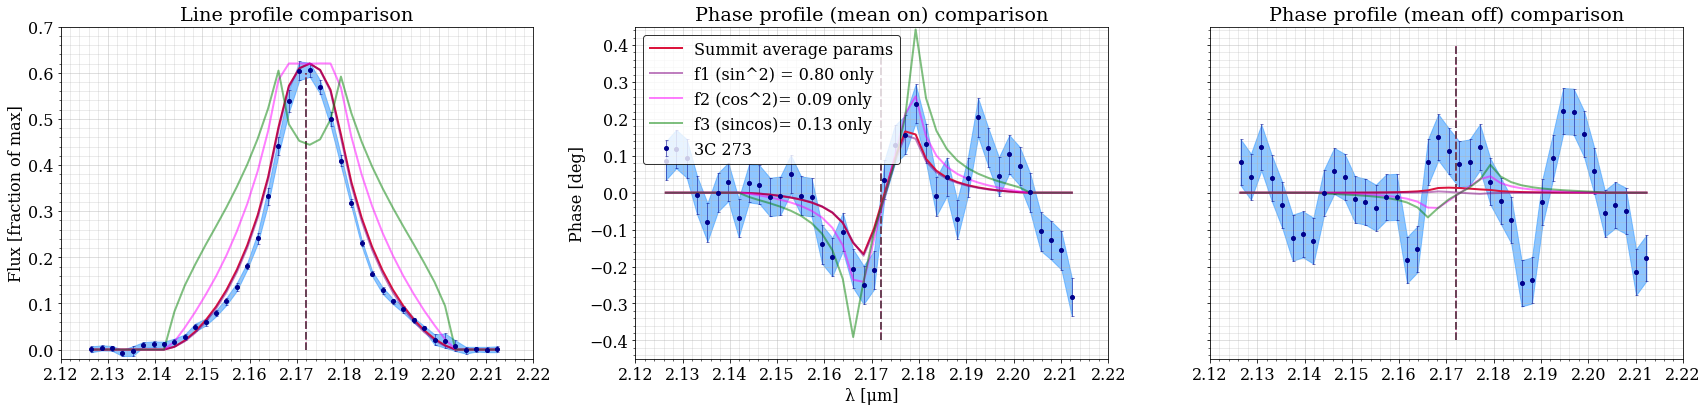

In [5]:
#making a guess at what it should be
#θ1 = [30.,3e3,0.7,30.,0.6,0.6,0.4,340.,1.1] #i,rBar,Mfac,rFac,f1,f2,f3,pa,scale -- 30.,1e3,1.1,1.,0.57,0.6,0.46,342.,1.1 is a good guess
θ1 = [30.,5590.94,0.36,15.80,0.80,0.84,0.75,320.,1.,0.]
#θ = [57.174,3680.964,0.540,20.158,0.653,0.480,0.447,342.295,0.994]
θ2 = [55.,5590.94,0.36,15.80,0.80,0.84,0.75,348.5,1.,0.]
θ1 = [56,4344.5,0.29796,26.27,0.7976,0.09175,0.12973,337.26,1.02321,0.00051]
θ2 = [56,4344.5,0.29796,26.27,0.7976,0.,0.,337.26,1.02321,0.00051]
θ3 = [56,4344.5,0.29796,26.27,0.,0.09175,0.,337.26,1.02321,0.00051]
θ4 = [56,4344.5,0.29796,26.27,0.,0.,0.12973,337.26,1.02321,0.00051]
labels = ["Summit average params","f1 (sin^2) = {:.2f} only".format(θ1[4]),"f2 (cos^2)= {:.2f} only".format(θ1[5]),"f3 (sincos)= {:.2f} only".format(θ1[6])]
colors = ["crimson","purple","magenta","green"]
αList = [1.,0.5,0.5,0.5]
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
λCen = 2.172
vel = (data[0]-λCen)/λCen*3e5
#print(log_prob(θ1,data)) #just proving it does change w/ inclination...
#print(log_prob(θ2,data))
fig,ax1,ax2,ax3=plotParams(data,[θ1,θ2,θ3,θ4],αList,colors,labels);
fig.savefig('windcomponents.png')

0.00 % complete

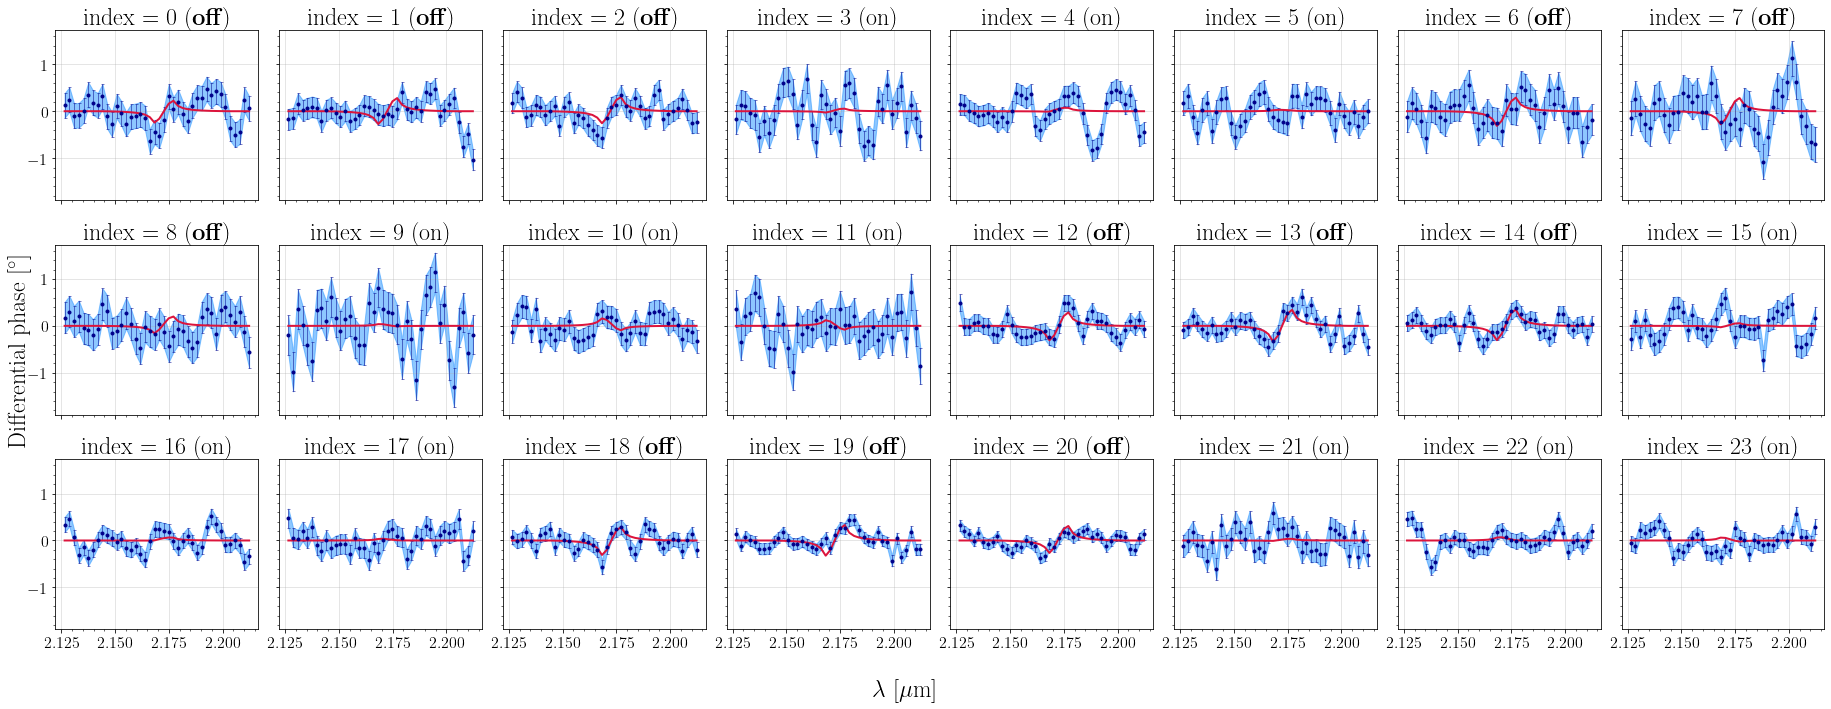

In [9]:
import matplotlib as mpl
fac = 2
SMALL_SIZE = 8*fac
MEDIUM_SIZE = 10*fac
BIGGER_SIZE = 12*fac

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
mpl.rcParams['text.usetex']=True
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
fig,axs=plotPhases(data,[avgParams],1); #avgParams from a few cells down
fig.savefig("avgParamsPhases.png")

100.00 % complete       

/home/kirk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  del sys.path[0]
/home/kirk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


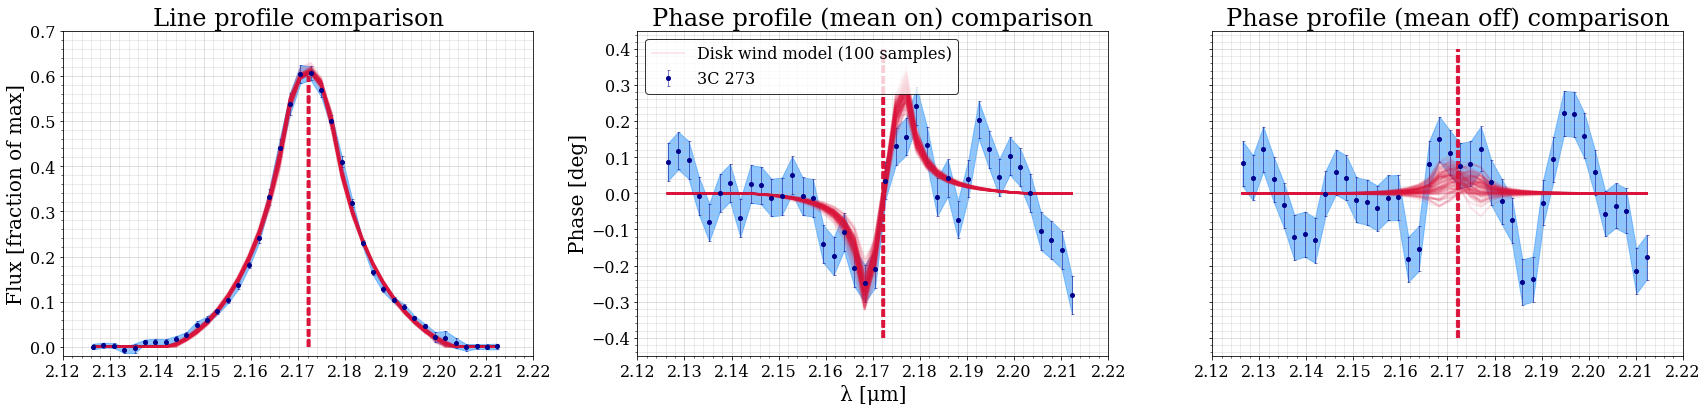

In [152]:
#θList = flat_samples[np.random.randint(len(flat_samples),size=100)] #this looks like nonsense, investigate further
θList = flat_samples[0,np.random.randint(len(flat_samples[0]),size=100),:] #looks good!
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
fig,ax1,ax2,ax3 = plotParams(data,θList)
fig.savefig('all_params_summitT0.png')

In [9]:
flat_samples.shape

(6, 240000, 11)

In [8]:
from IPython.display import display, Math
labels=["i","rBar","MFac","rFac","f1","f2","f3","f4","PA","scale","cenShift"]
#labels = labels[:-1]
avgParams = []
for i in range(len(labels)):
    #mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    mcmc = np.percentile(flat_samples[0,:, i], [16, 50, 84]) #PT way
    avgParams.append(mcmc[1])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.5f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
#old Summit run was [57.55,5590.94,0.36,15.8,0.8,0.84,0.75,348.5,1.,0.]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

![cloud parameters](cloudParams.png)

1080000
i = 89.09, rBar = 6781.97, MFac = 0.27, rFac = 38.74, f1 (sin^2 1) = 0.62, f2 (sin^2 2) = 0.88, f3 (sin*cos)= 0.09, f4 (cos^2) 0.51 pa = 321.05, scale = 1.00, cenShift = 0.0003
-666.2040873931282
-666.2040873931282
100.00 % complete

/home/kirk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  del sys.path[0]
/home/kirk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


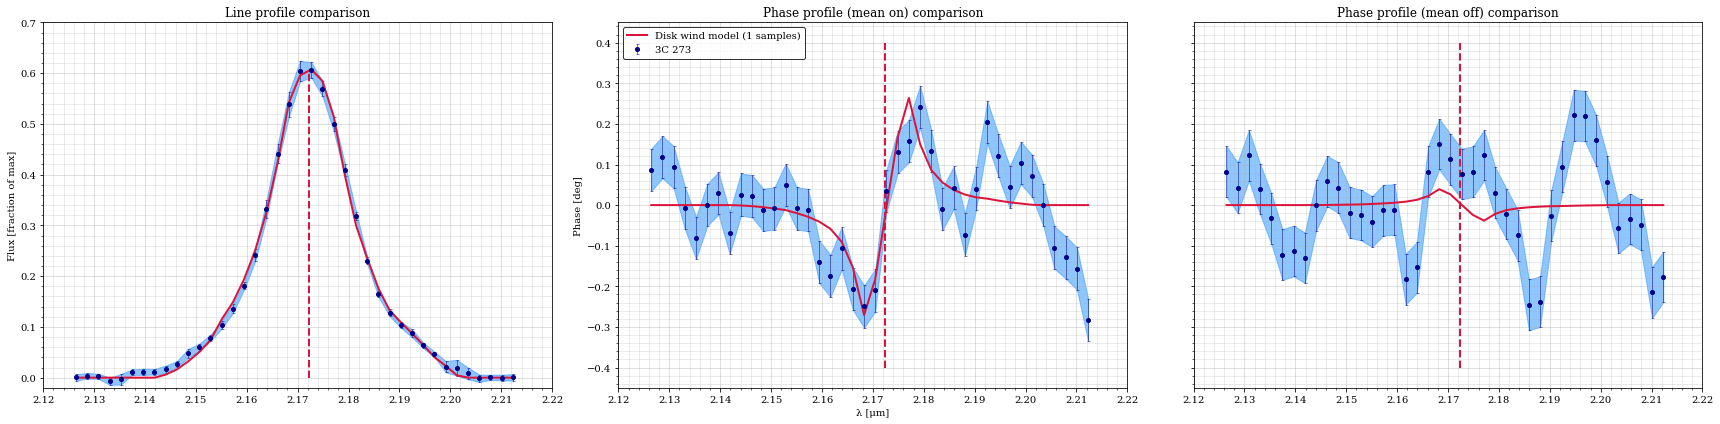

In [9]:
lhood_rescale = lhood[0,:] 
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")

plt.rcParams['text.usetex'] = False
print(len(lhood_rescale)) #only consider the lowest temp as the others should have swapped into this one
#lhood_rescale = prob #for non PT version
np.max(lhood_rescale)
maxInd = np.argmax(lhood_rescale)
lhood_rescale.flatten()[maxInd]
flatter_flat_samples = flat_samples.reshape(-1, flat_samples.shape[-1])
flat_samples_T0 = flat_samples[0,:,:]
θBest = flat_samples_T0[maxInd]
#θBest = flat_samples[maxInd]
print("""i = {0:.2f}, rBar = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2 1) = {4:.2f}, f2 (sin^2 2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, f4 (cos^2) {7:.2f} \
pa = {8:.2f}, scale = {9:.2f}, cenShift = {10:.4f}""".format(*θBest))
print(lhood_rescale.flatten()[maxInd])
print(log_prob(θBest,data))
fig,ax1,ax2,ax3=plotParams(data,[θBest],1)

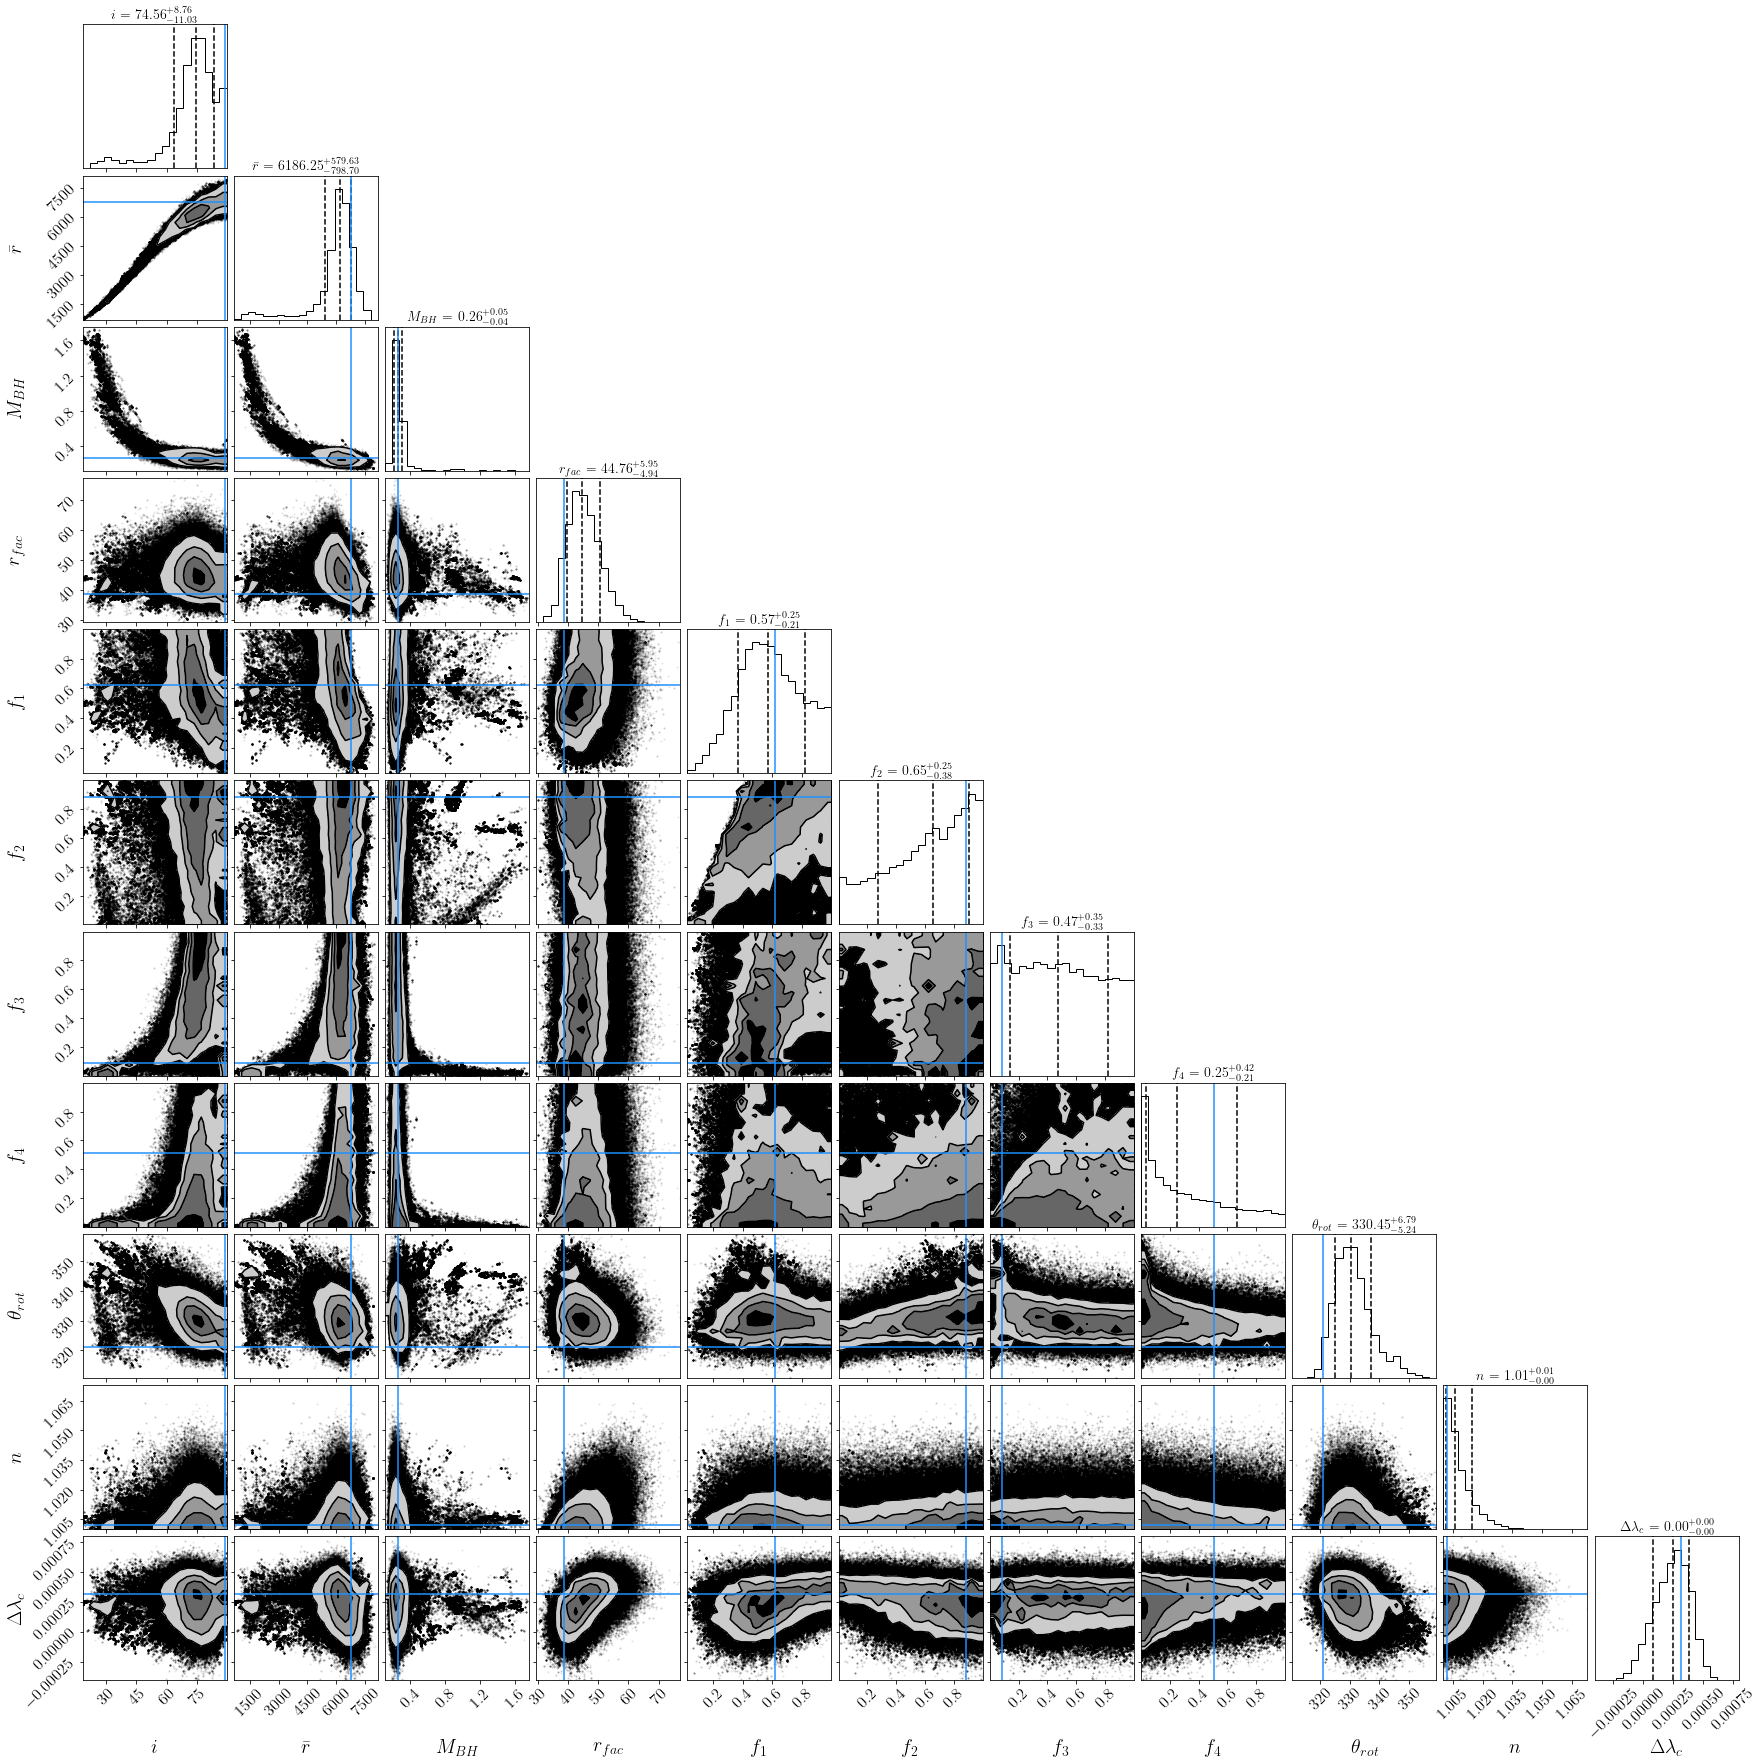

In [40]:
import corner
import matplotlib as mpl
mpl.rcParams['xtick.major.pad']='2'
mpl.rcParams['ytick.major.pad']='2'
mpl.rcParams['axes.labelpad']=40
mpl.rcParams['font.family']="Amiri"
mpl.rcParams['text.usetex']=True
#data = flat_samples[0,:,:]
n = len(flat_samples[0,:,:])
cmap = plt.cm.get_cmap('gist_rainbow', n)
colors = [cmap(i) for i in range(n)]
figure = corner.corner(flat_samples[0,:,:], labels=[r"$i$", r"$\bar{r}$", r"$M_{BH}$", r"$r_{fac}$",r"$f_1$",r"$f_2$",r"$f_3$",r"$f_4$",r"$\theta_{rot}$",r"$n$",r"$\Delta \lambda_c$"],
                       quantiles=[0.16, 0.5, 0.84],size=(40,40),fill_contours=True,top_ticks=False,
                       show_titles=True, title_kwargs={"fontsize": 14,"fontname":"Amiri"},labelpad=0.1)

ndim = 11
axes = np.array(figure.axes).reshape((ndim, ndim))
# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(θBest[i], color="dodgerblue")
    
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(θBest[xi], color="dodgerblue")
        ax.axhline(θBest[yi], color="dodgerblue")
        ax.plot(θBest[xi], θBest[yi], "darkblue")
# for i in range(11):
#     for j in range(11):
#         ax = axes[i,j]
#         ax.tick_params(axis='both', which='major', pad=500)
#figure.subplots_adjust(bottom=1.1,top=1.11)
figure.savefig("corner.png",bbox_inches="tight")

In [87]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [11]:
αutocorr

NameError: name 'αutocorr' is not defined

In [125]:
np.max(prob) #plot the best case
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")

#probAll = [log_prob(flat_samples[i],data) for i in range(len(flat_samples))]
maxInd = np.argmax(lhood_rescale)
#snd = np.partition(prob, 1)[1]
#minInd = np.argpartition(prob,4)[4]
#maxInd = np.argmax(prob)
θBest = flat_samples_T0[maxInd] #prob matches with pos, NOT with flat_samples (idk why we have that one seems redundant to save both?)
print(np.max(lhood_rescale))
print(log_lhood(θBest,data))
#θBest[8]*=0.8
#print(log_prob(θBest,data))
#i,rMin,Mfac,rFac,f1,f2,f3,pa,scale = θ
#θBest = [i,rMin,Mfac,rFac,f1,f2,f3,pa,scale,0.00035]
θ = np.copy(θBest)
# θ[-3] = 355.
print("""i = {0:.2f}, rBar = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2 1) = {4:.2f}, f2 (sin^2 2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, f4 (cos^2) {7:.2f} \
pa = {8:.2f}, scale = {9:.2f}, cenShift = {10:.4f}""".format(*θ))

########## low inclination starting guess params ############
# θ[0] = 20.#i
# θ[1] = 5e3 #rBar
# θ[2] = .3 #Mfac
# θ[3] = 20. #rFac
# θ[-2] = 1. #scale
# θ[-1] = -0.0005#cenShift -- there was a problem here but it was graphical only
# θ[4] = 1. #f1
# θ[5] =0.05  #f2
# θ[6] =1. #f3
# θ[-3] = 350. #pa
θ[-2] = 1.

############################################################
print(log_prob(θ,data))
#θBest[-2] = 1.
print(log_prob(θBest,data))
#θBest[-3] *= -1
#θBest[3] = 200.
# θBest[2] = 0.25
# θBest[0] = 65.
# θBest[6] = 0.5
# θBest[4] = 1.
# θBest[5] = 1.
#should also try a run with these parameters...seems to fit phase profile better? 
fig,ax1,ax2,ax3=plotParams(data,[θ],1)
fig.savefig('best_params_summit.png')
#fig.savefig('newstarting.png')

NameError: name 'lhood_rescale' is not defined

In [29]:
np.max(acor)*100

9413.849781661724

i = 74.04, rMin = 6148.07, MFac = 0.26, rFac = 44.83, f1 (sin^2 1) = 0.57, f2 (sin^2 2) = 0.64, f3 (sin*cos)= 0.45, f4 (cos^2) = 0.23 pa = 330.56, scale = 1.01, cenShift = 0.0002
-671.9276822896137
100.00 % complete

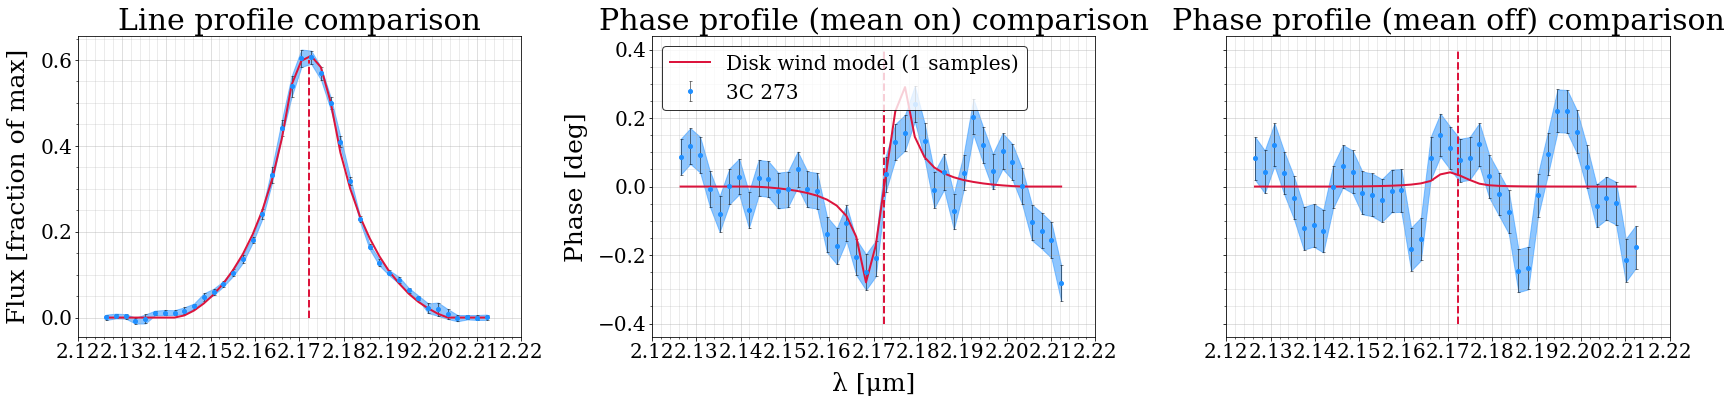

In [149]:
print("""i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2 1) = {4:.2f}, f2 (sin^2 2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, f4 (cos^2) = {7:.2f} \
pa = {8:.2f}, scale = {9:.2f}, cenShift = {10:.4f}""".format(*avgParams))
print(log_prob(avgParams,data))
fig,ax1,ax2,ax3=plotParams(data,[avgParams],1)
fig.savefig('avg_params_summit.png')

In [ ]:
#MCMC animation

fontFac=1.5
SMALL_SIZE = 8*fontFac
MEDIUM_SIZE = 10*fontFac
BIGGER_SIZE = 12*fontFac

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")

T1Walkers=flat_samples[0].reshape((25000,24,11))
T3Walkers=flat_samples[2].reshape((25000,24,11))
T6Walkers=flat_samples[3].reshape((25000,24,11))
cList=["Sienna","Coral","crimson"]; labelList=["Hottest","Medium","Coolest"]; alphaList=[0.7,0.7,1.]
for i in range(2500): #make 100 frame test
    if i%25==0:
        print("at i = {}/2500".format(i))
    fig,ax1,ax2,ax3=plotParams(data,[T6Walkers[i,0,:],T3Walkers[i,0,:],T1Walkers[i,0,:]],alphaList,cList,labelList)
    fig.savefig('tmpPlots2/test_{:04d}.png'.format(i))
    plt.close("all")

at i = 0/2500
100.00 % completeat i = 25/2500
100.00 % completeat i = 50/2500
100.00 % complete

100.00 % complete

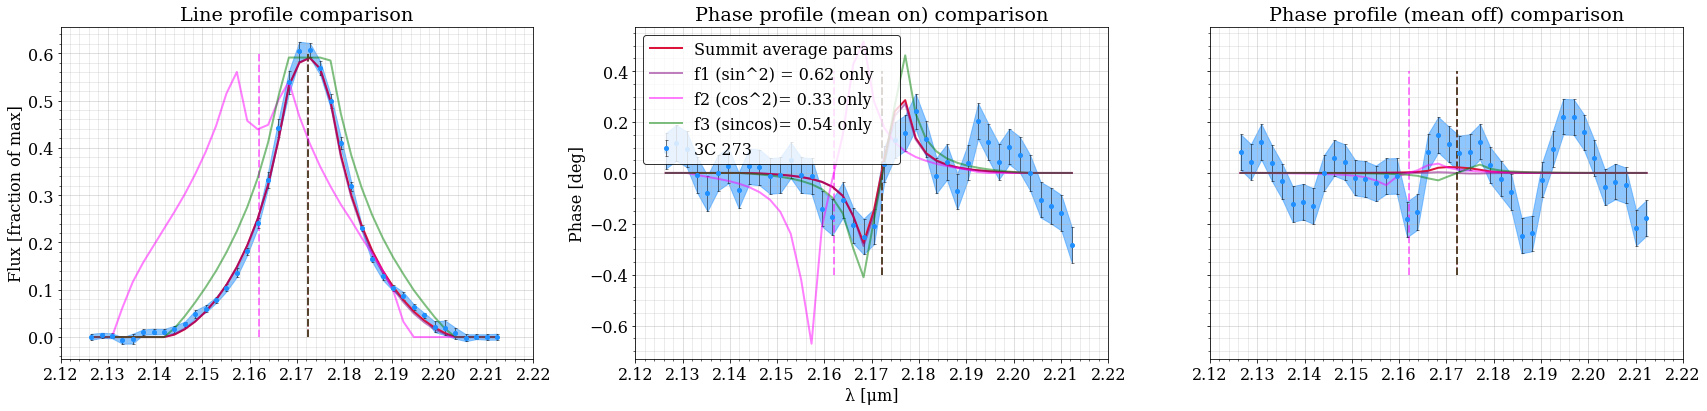

In [376]:
θ1 = np.copy(avgParams)
θ2 = np.copy(avgParams)
θ2[5],θ2[6] = 0.,0.
θ2[4] = 1.
θ3 = np.copy(avgParams)
θ3[4],θ3[6] = 0.,0.
θ3[5] = 1.
θ3[-1] = -0.01
θ3[0] = 80.
θ4 = np.copy(avgParams)
θ4[4],θ4[5] = 0.,0.
θ4[6] = 1.
labels = ["Summit average params","f1 (sin^2) = {:.2f} only".format(θ1[4]),"f2 (cos^2)= {:.2f} only".format(θ1[5]),"f3 (sincos)= {:.2f} only".format(θ1[6])]
colors = ["crimson","purple","magenta","green"]
αList = [1.,0.5,0.5,0.5]
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
λCen = 2.172
vel = (data[0]-λCen)/λCen*3e5
#print(log_prob(θ1,data)) #just proving it does change w/ inclination...
#print(log_prob(θ2,data))
fig,ax1,ax2,ax3=plotParams(data,[θ1,θ2,θ3,θ4],αList,colors,labels);
fig.savefig('windcomponents.png')

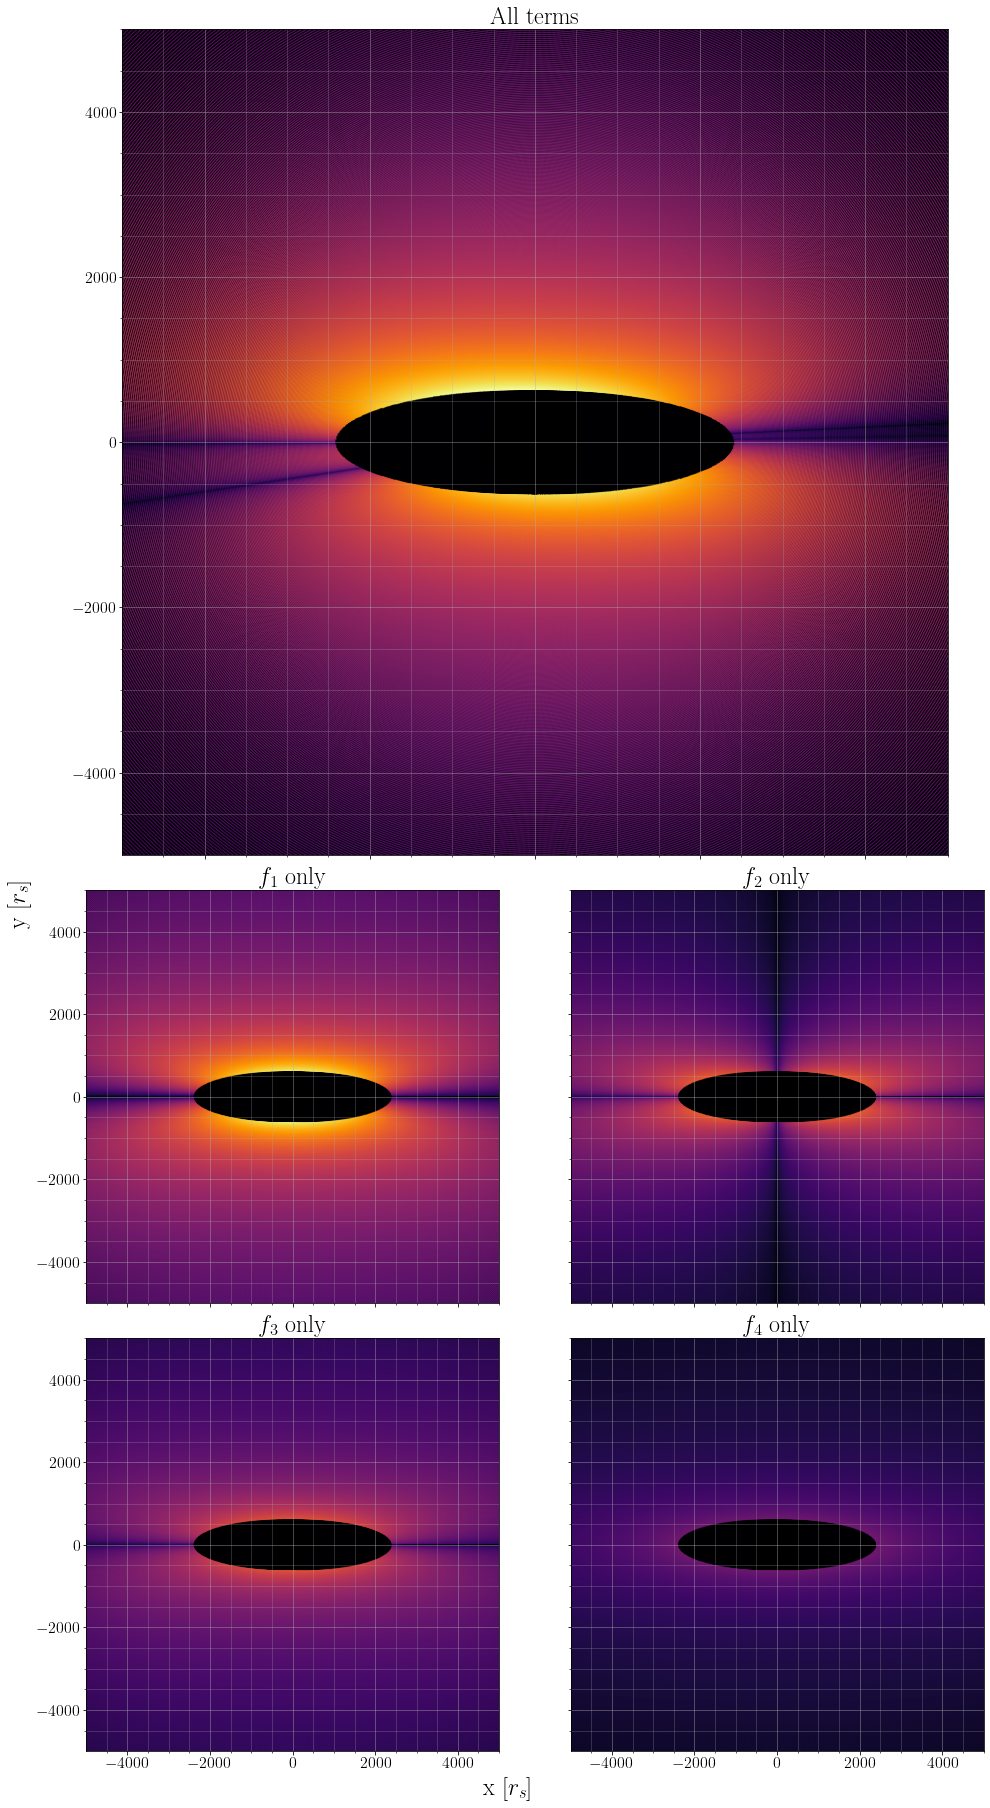

In [39]:
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")

#fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(12,12),facecolor='white',sharex=True,sharey=True)
fig,axs = plt.subplot_mosaic([['all','all'],['all','all'],['f1','f2'],['f3','f4']],sharex=True,sharey=True,figsize=(14,25),facecolor='white',constrained_layout=True)
def IWrapper(params,data,nr=1024,nϕ=2048): #this is ~3x as fast as python version!
    i,r̄,Mfac,rFac,f1,f2,f3,f4,pa,scale,cenShift = params; scale = 1.; windWeight = 1.; γ = 1.; A0 = 1.; τ = 10. #some parameters fixed for now
    α,β,r,νloc,ϕ,sini,cosi,dA,rMin,rMax = DiskWind.setup(i,nr,nϕ,r̄,rFac,γ)
    I,γ,A0,τ = DiskWind.getIntensity(r,ϕ,sini,cosi,rMin,rMax,γ,A0,τ,f1=f1,f2=f2,f3=f3,f4=f4)
    return I,α,β,νloc,dA

fac = 2
SMALL_SIZE = 8*fac
MEDIUM_SIZE = 10*fac
BIGGER_SIZE = 12*fac

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
# θBest = np.copy(avgParams)#doing average because best usually approaches 90
θ = [45.,3e3,1.,30.,1.,1.,1.,1.,330.,1.,0.] #to compare with Julia notebook model plots
θ = np.copy(avgParams) #for actual fit, use avg params because θBest too close to 90
# I,α,β,ν,dA = IWrapper(θBest,data)
# tmpθ = np.copy(θBest)
I,α,β,ν,dA = IWrapper(θ,data)
tmpθ = np.copy(θ)
tmpθ[5] = 0. #f1 only
tmpθ[6] = 0.
tmpθ[7] = 0.
I1,α,β,ν,dA = IWrapper(tmpθ,data)
tmpθ = np.copy(θ)
tmpθ[4] = 0.
tmpθ[6] = 0. #f2 only
tmpθ[7] = 0.
I2,α,β,ν,dA = IWrapper(tmpθ,data)
tmpθ = np.copy(θ)
tmpθ[4] = 0.
tmpθ[5] = 0. #f3 only
tmpθ[7] = 0.
I3,α,β,ν,dA = IWrapper(tmpθ,data)
tmpθ = np.copy(θ)
tmpθ[4] = 0.
tmpθ[5] = 0. #f4 only
tmpθ[6] = 0.
I4,α,β,ν,dA = IWrapper(tmpθ,data)
fList = [θBest[4],θBest[5],θBest[6]]
IList = [I,I1,I2,I3,I4]

plt.rcParams['text.usetex'] = True
for i in range(len(IList)):
    #ax = axs.flatten()[i]; Iloop = IList[i];
    key = list(axs.items())[i]
    ax = axs[key[0]]
    #ax = axs.items()[i]; 
    Iloop = IList[i]
    ax.set_facecolor('k')
    ax.scatter(α,β,marker='.',s=1,c=Iloop**0.25,cmap='inferno',vmin=0.0,vmax=np.max(IList[0]**0.25));
    #ax.plot(1e3*np.cos(φ),1e3*np.sin(φ),c='k');
    ax.set_xlim(-5e3,5e3); ax.set_ylim(-5e3,5e3)
    ax.set_aspect(1)
#     title = "f{0} = {1:.2f} only".format(i,fList[i-1]) if i>0 else "Best fit (i = {:.2f})".format(θBest[0])
    title = r"$f_{0}$ only".format(i) if i>0 else "All terms"
    ax.set_title(title)
    ax.minorticks_on()
    ax.grid(visible=True,which="major",alpha=0.5)
    ax.grid(visible=True,which="minor",alpha=0.3)
fig.supxlabel(r"x [$r_s$]"); fig.supylabel(r"y [$r_s$]")
fig.savefig('fcomparisonACTUALCLOSE.png',dpi=150)

In [28]:
#axs[list(axs.items())[0][0]]
fList = [θBest[4],θBest[5],θBest[6],θBest[7]]

IndexError: index 4 is out of bounds for axis 0 with size 4

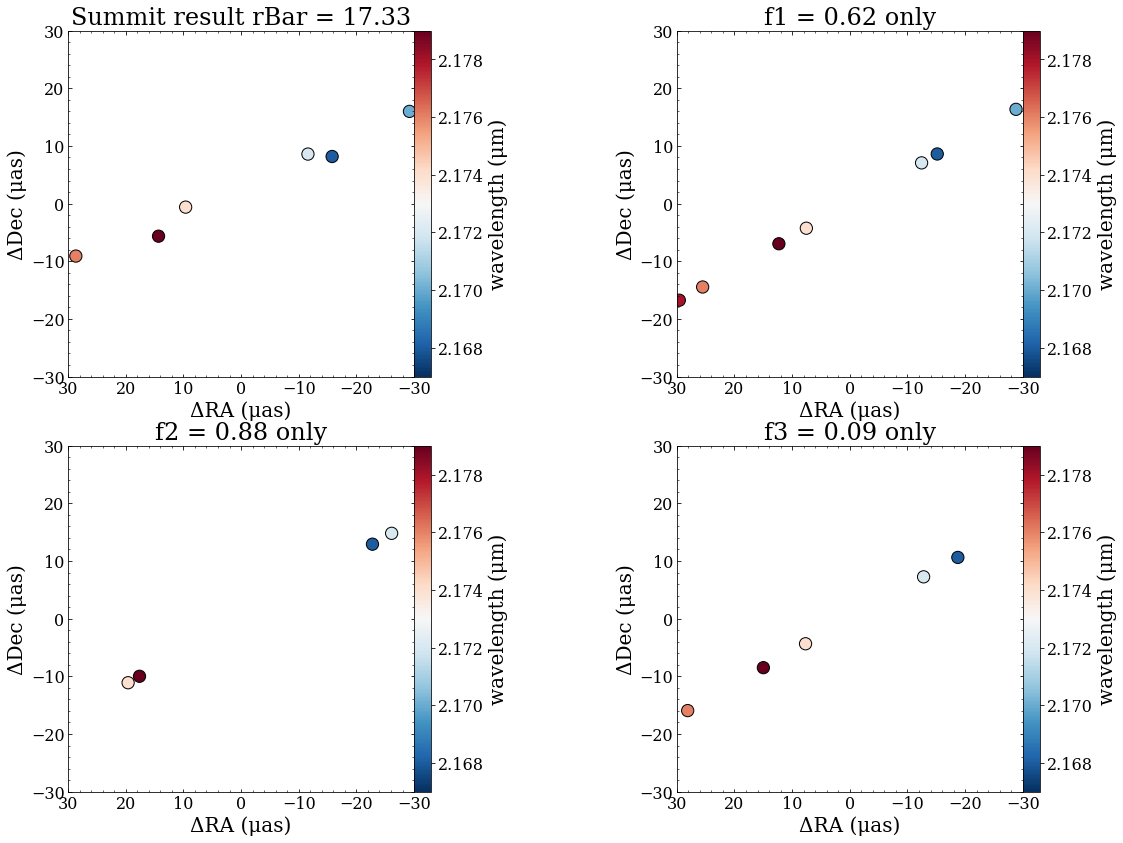

In [29]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
plt.close("all")
BLRAng = avgParams[2]*3e8*2e33*6.67e-8/9e20/548/3.09e24 #rad
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(20,14),facecolor="white")
channels = np.array([2.168+i*0.002 for i in range(6)])
λ = (2.172+avgParams[-1])/ν
channels

# def plot_data(data, aspect, pad=None):
#     if aspect == None:
#         aspect = 1
#     fig, ax = plt.subplots()
#     img = ax.imshow(data, aspect=aspect)
#     last_axes = plt.gca()
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes('right', size='5%', pad=0.25*aspect**2-1.29*aspect+1.09)
#     cbar = fig.colorbar(img, cax=cax)
#     plt.sca(last_axes)
rot = -(avgParams[-3])/180*np.pi
for i in range(len(IList)):
    ax = axs.flatten()[i]; Iloop = IList[i]
    xC,yC = np.zeros(len(channels)+1),np.zeros(len(channels)+1)
    for j in range(len(channels)+1):
        if j == 0:
            mask = np.where(λ<=channels[j])
        elif j==len(channels):
            mask = np.where(λ>channels[j-1])
        else:
            mask = np.where((λ>channels[j-1]) & (λ<=channels[j]))
        
        X = np.sum(Iloop[mask]*α[mask]*dA[mask])/np.sum(Iloop[mask]*dA[mask]); Y = np.sum(Iloop[mask]*β[mask]*dA[mask])/np.sum(Iloop[mask]*dA[mask])
        xC[j],yC[j] = X,Y
    
    xCRot = (np.cos(rot)*xC-np.sin(rot)*yC); yCRot = np.sin(rot)*xC+np.cos(rot)*yC
    
    s=ax.scatter(-xCRot*2*BLRAng/4.848e-12,yCRot*2*BLRAng/4.848e-12,c=np.array([2.168+i*0.002 for i in range(7)]),cmap="RdBu_r",vmin=2.167,vmax=2.179,
                edgecolors="k",s=150)#,c=channels,cmap="RdBu_r")#,c=channels*1e3,cmap="RdBu")
    ax.set_xlim(-30,30); ax.set_ylim(-30,30)
    ax.set_aspect("equal")
    #xticks = [30-10*i for i in range(7)]
    #xticklabels = [str(tick) for tick in xticks]
    #ax.set_xticks(xticks)
    #ax.set_xticklabels(xticklabels)
    ax.invert_xaxis()

    plt.colorbar(s, ax=ax,fraction=0.05,pad=0.,label="wavelength (μm)")
    title = "f{0} = {1:.2f} only".format(i,fList[i-1]) if i>0 else "Summit result rBar = {:.2f}".format(avgParams[1]*2*avgParams[2]*3e8*2e33*6.67e-8/9e20/548/3.09e24/4.85e-12)
    ax.set_title(title)
    ax.set_facecolor("white")
    ax.minorticks_on()
    ax.tick_params(which="both",direction="in",top=True,right=True,labeltop=False,labelright=False)
    ax.set_xlabel("ΔRA (μas)")
    ax.set_ylabel("ΔDec (μas)")
    # λCen = 2.172+θBest[-1]
# vel = (ν-1.)*3e5
# for i in range(len(IList)):
#     ax = axs.flatten()[i]; Iloop = IList[i];
#     xC,yC = np.zeros(len(channels)), np.zeros(len(channels))
#     for j in range(len(channels)):
#         if j==0:
#             mask = np.where((vel<channels[j]))
#         elif j==(len(channels)-1):
#             mask = np.where((vel>channels[j]))
#         else:
#             mask = np.where((vel>channels[j-1]) & (vel<channels[j]))
        
#         xCen = np.sum(Iloop[mask]*α[mask])/np.sum(Iloop[mask]); yCen = np.sum(Iloop[mask]*β[mask])/np.sum(Iloop[mask])
#         xC[j],yC[j] = xCen,yCen
        
#     #s=ax.scatter(xC*2*blRange/4.85e-12,yC*2*blRange/4.85e-12,c=(νBin-1)*3e5,cmap="RdBu",vmin=-2e3,vmax=2e3)
#     s=ax.scatter(xC*2*blRange/4.85e-12,yC*2*blRange/4.85e-12,c=channels,cmap="RdBu_r")
#     ax.set_xlim(-30,30); ax.set_ylim(-30,30)
#     ax.set_aspect("equal")
#     ax.invert_xaxis()
#     plt.colorbar(s,ax=ax);
#     title = "f{0} = {1:.2f} only".format(i,fList[i-1]) if i>0 else "Summit result rBar = {:.2f}".format(θBest[1]*2*θBest[2]*3e8*2e33*6.67e-8/9e20/548/3.09e24/4.85e-12)
#     ax.set_title(title)
#     ax.set_facecolor("k")
# fig.savefig('centroidscomparison.png',dpi=150)

In [10]:
#fitting for data x,y
def d_phase(params):
    x,y,u,v,fline = params
    return -2*np.pi*(u*x+v*y)*(fline/(1+fline))*180/np.pi*1e6 #rad -> deg, 1e6 from [u,v] = Mλ

def wrap(x,args=np.zeros(4)):
    params = [*x,*args[1:]]
    ϕ = args[0]
    return np.abs(d_phase(params)-ϕ)

def wrap2(x,arg1,arg2,arg3,arg4):
    params = [*x,arg2,arg3,arg4]
    ϕ = arg1
    return np.abs(d_phase(params)-ϕ)

def f2d(params,x,y,ϕ):
    params = [x,y,*params]
    return np.abs(d_phase(params)-ϕ)

In [23]:
from scipy.optimize import minimize, least_squares
λData = data[0]
UData = data[1]; VData = data[2]
ϕData = data[4]
IData = data[3]
x0 = np.array([0,0],dtype=int)
centroids=[]; strLen = 0

def baselineFit(x,y,UData,VData,IData,ϕData,λi,onlyOn=True):
    z = 0
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]
    for i in range(len(UData)):
        if onlyOn:
            if i in indx:
                Bi = i
                z += f2d([UData[Bi],VData[Bi],IData[λi]],x,y,ϕData[Bi,λi]) #wavelength,baseline indices
        else:
            Bi = i
            z += f2d([UData[Bi],VData[Bi],IData[λi]],x,y,ϕData[Bi,λi]) #wavelength,baseline indices
    return z

def f2min(x0,args=np.zeros(6)):
    UData,VData,IData,ϕData,λi,onlyOn = args
    z = baselineFit(x0[0],x0[1],UData,VData,IData,ϕData,λi,onlyOn)
    return z


for i in range(len(λData)):
    ϕ = ϕData[:,i]
    I = IData[i]
    tmp = [0.,0.]
    res = minimize(f2min,x0,args=[UData,VData,IData,ϕData,i,False],method="Nelder-Mead",options={'xatol': 1e-12})
    if res.success == True:
        centroids.append(res.x)
    else:
        print("problem at i = {0}".format(i))
        break
    strLen = trackPercent(i+1,len(λData),strLen)
    

100.00 % complete

In [43]:
UData/λ[0]

array([ -8.62791469, -15.78498789, -22.90124679,  -7.02701621,
       -14.01218143,  -6.94285029, -11.64352532, -15.3867791 ,
       -17.25054287,  -3.65217756,  -5.44591906,  -1.91541963,
       -11.70624296, -18.69682728, -25.05427297,  -7.0337835 ,
       -13.33338718,  -6.32933523, -11.42799242, -18.07303925,
       -23.34729986,  -6.19291474, -11.03445208,  -5.13159209])

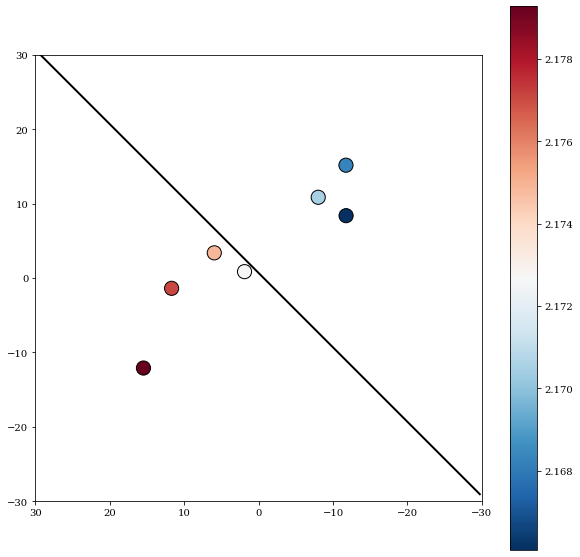

In [22]:
xCD = np.array([centroid[0] for centroid in centroids]); yCD = np.array([centroid[1] for centroid in centroids])
fig,ax = plt.subplots(figsize=(10,10),facecolor="white")
mask = ((λData > 2.166) & (λData < 2.18))

conv = 206264806719 #rad to μas
c=ax.scatter(xCD[mask]*conv,yCD[mask]*conv,c=λData[mask],cmap="RdBu_r",
                edgecolors="k",s=200)#,c=channels,cmap="RdBu_r")#,c=channels*1e3,cmap="RdBu")
ax.set_aspect("equal")
fig.colorbar(c,ax=ax)
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
jetx,jety = np.zeros(100),np.linspace(-40,40,100)
jetθ = -222/180*np.pi #rotating from N into + RA
jetX = -np.sin(jetθ)*jetx + np.cos(jetθ)*jety; jetY = np.sin(jetθ) + np.cos(jetθ)*jety
ax.plot(jetX,jetY,color='k',lw=2)
ax.invert_xaxis()


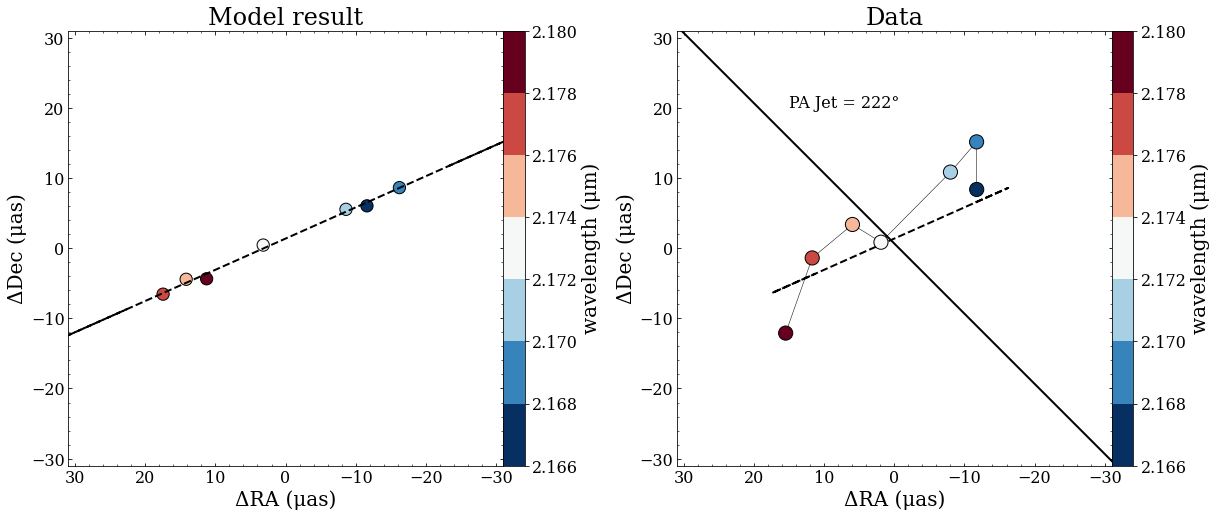

In [35]:
from scipy.optimize import curve_fit
import matplotlib as mpl
plt.close("all")
plt.rcParams['text.usetex']=False
fontFac=2
SMALL_SIZE = 8*fontFac
MEDIUM_SIZE = 10*fontFac
BIGGER_SIZE = 12*fontFac

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



BLRAng = θBest[2]*3e8*2e33*6.67e-8/9e20/548/3.09e24
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(20,8),facecolor="white")
channelCenters = λData[mask]
channels = []
for i in range(len(channelCenters)):
    if i == 0:
        Δ = np.abs(channelCenters[1]-channelCenters[0])
        channels.append(channelCenters[0] - Δ/2) #left edge
    elif i == len(channelCenters)-1:
        Δ = np.abs(channelCenters[-1]-channelCenters[-2])
        channels.append(channelCenters[-1] - Δ/2) #left edge
        channels.append(channelCenters[-1] + Δ/2) #right edge
    else:
        Δ = np.abs(channelCenters[i]-channelCenters[i-1])
        channels.append(channelCenters[i]-Δ/2) #left edge
        
        
λmod = (2.172+avgParams[-1])/ν

rot = -(avgParams[-3])/180*np.pi
for i in range(2):
    ax = axs.flatten()[i]; Iloop = IList[0] if i==0 else IData
    cmap = plt.cm.RdBu_r
    bounds = np.linspace(2.166,2.180,8)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    if i == 0:
        xC,yC = np.zeros(len(channels)-1),np.zeros(len(channels)-1)
        for j in range(len(channels)-1):
            if j == 0 or j == len(channels)-2:
                maskMod = np.where((λmod>=channels[j]) & (λmod <= channels[j+1]))
            else:
                maskMod = np.where((λmod>channels[j]) & (λmod <= channels[j+1]))

            X = np.sum(Iloop[maskMod]*α[maskMod]*dA[maskMod])/np.sum(Iloop[maskMod]*dA[maskMod]); Y = np.sum(Iloop[maskMod]*β[maskMod]*dA[maskMod])/np.sum(Iloop[maskMod]*dA[maskMod])
            xC[j],yC[j] = X,Y
    
        xCRot = (np.cos(rot)*xC-np.sin(rot)*yC); yCRot = np.sin(rot)*xC+np.cos(rot)*yC
        s=ax.scatter(-xCRot*BLRAng/4.848e-12,yCRot*BLRAng/4.848e-12,c=channelCenters,cmap=cmap,norm=norm,
                edgecolors="k",s=150)#,c=channels,cmap="RdBu_r")#,c=channels*1e3,cmap="RdBu")
        def f(x,m,b):
            return m*x + b
        fit,cov = curve_fit(f,-xCRot*BLRAng/4.848e-12,yCRot*BLRAng/4.848e-12)
        xline=-xCRot*2*BLRAng/4.848e-12
        
        ax.plot(xline,f(xline,*fit),lw=2,ls="--",c="k")
        
    else:
        ax.plot(xCD[mask]*conv,yCD[mask]*conv,c="k",ls="-",lw=0.5)
        ax.annotate("PA Jet = 222°",(15,20))
        s=ax.scatter(xCD[mask]*conv,yCD[mask]*conv,c=λData[mask],cmap=cmap,norm=norm,
                edgecolors="k",s=200,zorder=10)#,c=channels,cmap="RdBu_r")#,c=channels*1e3,cmap="RdBu")
        fit,cov = curve_fit(f,-xCRot*BLRAng/4.848e-12,yCRot*BLRAng/4.848e-12)
        ax.plot(-xCRot*BLRAng/4.848e-12,f(-xCRot*BLRAng/4.848e-12,*fit),lw=2,ls="--",c="k")
        
    
    ax.set_xlim(-31,31); ax.set_ylim(-31,31)
    ax.set_aspect("equal")
    #xticks = [30-10*i for i in range(7)]
    #xticklabels = [str(tick) for tick in xticks]
    #ax.set_xticks(xticks)
    #ax.set_xticklabels(xticklabels)
    jetx,jety = np.zeros(100),np.linspace(-45,45,100)
    jetθ = -222/180*np.pi #rotating from N into + RA
    jetX = -np.sin(jetθ)*jetx + np.cos(jetθ)*jety; jetY = np.sin(jetθ) + np.cos(jetθ)*jety
    if i>0:
        ax.plot(jetX,jetY,color='k',lw=2)
    ax.invert_xaxis()
    
    fig.colorbar(s, ax=ax,fraction=0.05,pad=0.,label="wavelength (μm)",spacing='proportional',ticks=bounds,boundaries=bounds)
    title = "Data".format(i,fList[i-1]) if i>0 else "Model result"#.format(avgParams[1]*2*avgParams[2]*3e8*2e33*6.67e-8/9e20/548/3.09e24/4.85e-12)
    ax.set_title(title)
    ax.set_facecolor("white")
    ax.minorticks_on()
    ax.tick_params(which="both",direction="in",top=True,right=True,labeltop=False,labelright=False)
    ax.set_xlabel("ΔRA (μas)")
    ax.set_ylabel("ΔDec (μas)")
fig.savefig("centroid_comparison.pdf")

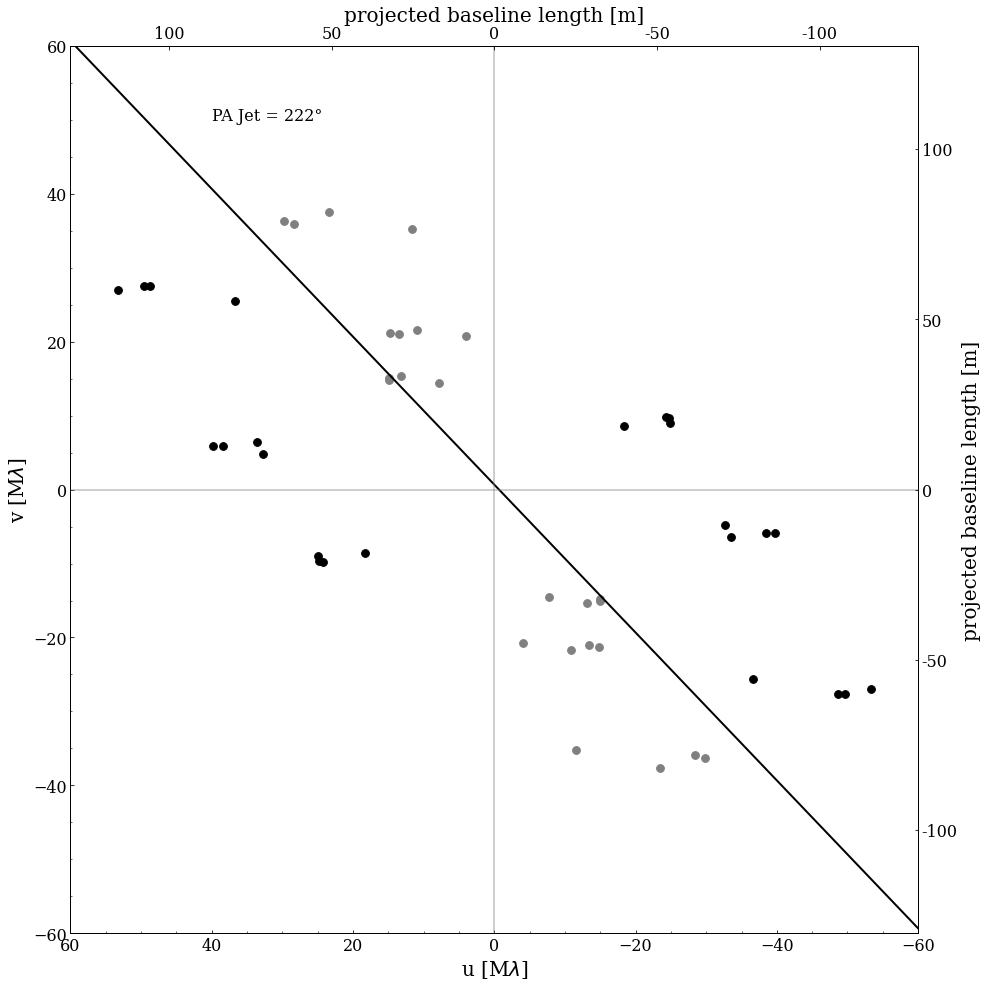

In [141]:
#baseline plot
fig,ax=plt.subplots(figsize=(14,14),facecolor='white')
indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
for i in range(len(UData)):
    if i in indx:
        ax.scatter(UData[i],VData[i],color='k',s=60)
        ax.scatter(-UData[i],-VData[i],color='k',s=60)
    else:
        ax.scatter(UData[i],VData[i],color='grey',s=60)
        ax.scatter(-UData[i],-VData[i],color='grey',s=60)

jetx,jety = np.zeros(100),np.linspace(-100,100,100)
jetθ = -222/180*np.pi #rotating from N into + RA
jetX = -np.sin(jetθ)*jetx + np.cos(jetθ)*jety; jetY = np.sin(jetθ) + np.cos(jetθ)*jety
ax.plot(jetX,jetY,color='k',lw=2)
ax.annotate("PA Jet = 222°",(40,50))
ax.set_xlim(60,-60)
ax.set_ylim(-60,60)
ax.tick_params(which="both",direction="in",labeltop=False,labelright=False)

ax2 = ax.twiny()
ax3 = ax.twinx()
mticks = np.array([100,50,0,-50,-100])
new_tick_locations = mticks/2.172

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels([str(tick) for tick in mticks])
ax3.set_ylim(ax.get_ylim())
ax3.set_yticks(new_tick_locations)
ax3.set_yticklabels([str(tick) for tick in mticks])
ax2.tick_params(which="both",direction="in",labeltop=True,labelright=False)
ax3.tick_params(which="both",direction="in",labeltop=False,labelright=True)
ax3.set_ylabel("projected baseline length [m]")
ax2.set_xlabel("projected baseline length [m]")
ax.set_xlabel(r"u [M$\lambda$]")
ax.set_ylabel(r"v [M$\lambda$]")
ax.plot([70,-70],[0,0],color='grey',alpha=0.5)
ax.plot([0,0],[70,-70],color='grey',alpha=0.5)
ax.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
#fig.suptitle("UV coverage of observations")
#ax.set_aspect('equal')
#fig.savefig("baselines")
fig.tight_layout()
fig.savefig("baselines.png")

In [133]:
def χ2red(θ,data):
    ν,lineInterpY,phaseInterpList = getProfiles(θ,data)
    yLErr = data[6]
    lineχ = numpy.sum(((data[3]-lineInterpY)/yLErr)**2)
    phaseχ = numpy.sum([numpy.sum(((data[4][i] - phaseInterpList[i])/data[5][i,:])**2) for i in range(len(phaseInterpList))])
    N = len(yLErr)+len(data[4].flatten())
    return (lineχ+phaseχ)/(N-len(θ))
print("avg params χ2red = {:.3f}".format(χ2red(avgParams,data)))
print("θ best χ2red = {:.3f}".format(χ2red(θBest,data)))

avg params χ2red = 1.359
θ best χ2red = 1.350


In [30]:
x = np.linspace(-30,30,1000)/conv
y = np.linspace(-30,30,1000)/conv
x,y = np.meshgrid(x,y)
λi =37; Bi = 20
cmap0 = plt.cm.RdBu_r

for λ in range(40):
    z = np.zeros(np.shape(x))
    for i in range(24):
        Bi = i
        z += f2d([UData[Bi],VData[Bi],IData[λ]],x,y,ϕData[Bi,λ]) #wavelength,baseline indices
    if λData[λ] in λData[mask]:
        bounds = np.linspace(0,10.,13)
        #cmap = plt.cm.magma
        colors = [cmap0((λData[λ]-2.172)/(-2.166+2.180)+0.5),(0.,0.,0.,1.)]
        cmap = LinearSegmentedColormap.from_list("lambda_i",colors)
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        fig,ax = plt.subplots(figsize=(10,10),facecolor="white")
        c = ax.pcolormesh(x*conv, y*conv, z, cmap=cmap,shading='auto',norm=norm)
        ax.grid(which="both")
        #fig.colorbar(c,ax=ax,label="|calculated Δϕ - observed Δϕ| ")
        ax.axis([x.max()*conv,x.min()*conv,y.min()*conv,y.max()*conv])
        ax.set_aspect('equal')
        ax.set_xlabel("x [μas]");ax.set_ylabel("y [μas]")
        ax.set_title("λ = {0:.4f} μm".format(λData[λ]))
        fig.colorbar(c, ax=ax,fraction=0.04764,pad=0.,label="|calculated Δϕ - observed Δϕ|",spacing='proportional',ticks=bounds,boundaries=bounds)
        fig.savefig("tmpPlots/i{0:02d}".format(λ+1))
        plt.close("all")

In [18]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap = plt.cm.RdBu_r
bounds = np.linspace(2.166,2.180,8)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
colors = [cmap(0.2),(0.,0.,0.,1.)]
cmaptest = LinearSegmentedColormap.from_list("test",colors)


In [36]:
def plotParamsStacked(data,θList,mα=0.1,cList=[],labelList=[],last=True):
    λCen=2.172; ν = (data[0]-λCen)/λCen*3e5; ν = data[0] #not really ν anymore but testing wavelength space
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
    fig,ax1 = plt.subplots(figsize=(12,10),facecolor="white")
    #ax1.set_xlim(2.13,2.21)
    ax2 = ax1.twinx()
    
    meanOn = np.mean(np.array(data[4])[indx],axis=0)
    onErr = np.sqrt(1/np.sum((np.array(data[5])[indx])**(-2),axis=0)) #see weighted average here: http://www.physics.umd.edu/courses/Phys261/F06/ErrorPropagation.pdf
    
    dodgerBlue=(.12,0.56,1.00)
    ax1.errorbar(ν,data[3]+1.,yerr=data[6],marker="o",ms=4,label="3C 273",markerfacecolor="darkblue",markeredgecolor="darkblue",linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='darkblue')
    ax2.errorbar(ν,meanOn,yerr=onErr,label="3C 273",marker="o",ms=4,markerfacecolor="darkblue",markeredgecolor="darkblue",linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='darkblue')
    ax1.fill_between(ν,data[3]-data[6]+1.,data[3]+data[6]+1.,color=dodgerBlue,alpha=0.5)
    ax2.fill_between(ν,meanOn-onErr,meanOn+onErr,color=dodgerBlue,alpha=0.5)
    strLen = 0; place = 1; N = len(θList)
    for θ in θList:
        try:
            i,rMin,Mfac,rFac,f1,f2,f3,f4,pa,scale,cenShift = θ
            λCen=2.172+cenShift; #ν = (data[0]-λCen)/λCen*3e5
        except:
            i,rMin,Mfac,rFac,f1,f2,f3,pa,scale,cenShift = θ
            f4 = np.copy(f3); f3 = np.copy(f2); f2 = np.copy(f1)
            θ = np.array([i,rMin,Mfac,rFac,f1,f2,f3,f4,pa,scale,cenShift])
        try:
            ν,line,phaseList = getProfiles(np.array(θ,dtype=float),data)
        except:
            print("""problem with: i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2 1) = {4:.2f}, f2 (sin^2 2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, f4 (cos^2)= {7:.2f} \
pa = {8:.2f}, scale = {9:.2f}, cenShift = {10:.4f}""".format(*θ))
        phase = np.mean(np.array(phaseList)[indx],axis=0); #phaseo = np.mean(np.array(phaseList)[oindx],axis=0)
        label = "Model fits".format(N) if place == N else ""
        label = labelList[place-1] if len(labelList)>0 else label
        c = cList[place-1] if len(cList)>0 else "crimson"
        mαLoc = mα[place-1] if type(mα) is list else mα
        lw = 2; ls = "-"
        if last == True and place == N:
            mαLoc = 1.; lw=4; ls="--"

        ax1.plot(ν,line+1.,label=label,lw=lw,c=c,alpha=mαLoc,ls=ls)
        ax2.plot(ν,phase,label=label,lw=lw,c=c,alpha=mαLoc,ls=ls)
        if last == True and place == N:
            label = "Line center" 
            ax1.vlines(λCen,0.2,1.8,label=label,colors=c,ls="--",lw=lw,alpha=mαLoc)
        strLen = trackPercent(place,N,strLen); place+=1
    ax1.set_title("Line and phase profile comparison")
    ax1.set_ylim(0.2,1.8)
    ax2.set_ylim(-0.4,1.2)
    #ax2.set_xlabel("Velocity [km/s]")
    ax1.set_xlabel("λ [μm]")
    ax1.set_ylabel("Normalized flux")
    ax2.set_ylabel("Δϕ [deg]")
    l = ax2.legend(loc='upper left')
    pltFormatter(fig,[ax1],legend=l)
    ax2.set_xticks([2.12,2.13,2.14,2.15,2.16,2.17,2.18,2.19,2.20,2.21,2.22])
    ax2.set_xlim(2.126,2.21)
    ax1.set_xlim(2.126,2.21)
    fig.tight_layout()
    return fig,ax1,ax2

89.09234784552403 6781.971998833058 0.2656756579050318 38.7424246776238 0.620757566726871 0.8844504713881787 0.08657665406726357 0.5098816449616059 321.0482863816528 1.0020523489516422 0.00031421256455078114
100.00 % complete       

/home/kirk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  del sys.path[0]
/home/kirk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


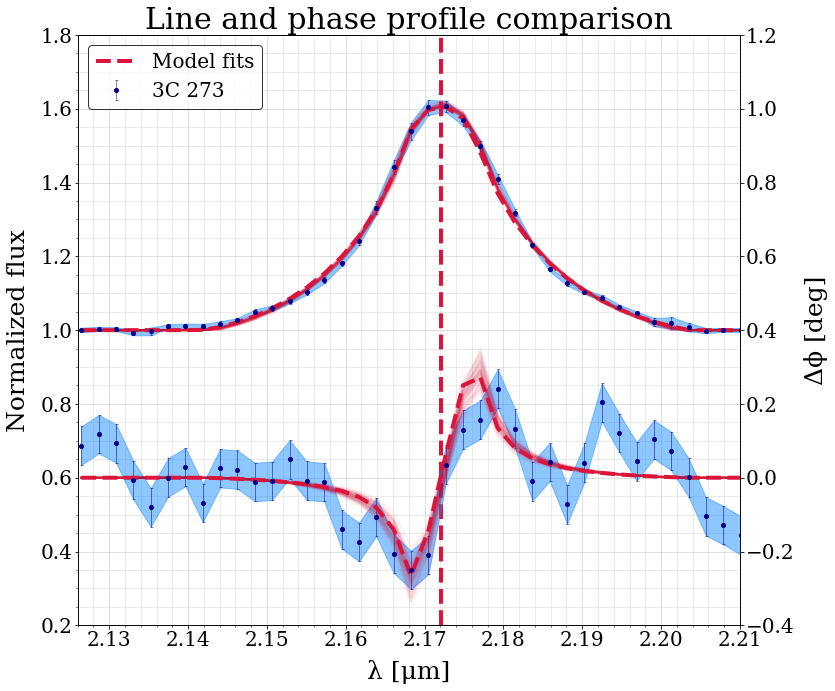

In [37]:
import matplotlib as mpl
mpl.rcParams['xtick.major.pad']='2'
mpl.rcParams['ytick.major.pad']='2'
mpl.rcParams['axes.labelpad']=10
mpl.rcParams['font.family']="DejaVu Serif"
mpl.rcParams['text.usetex']=False
fontFac=2.5
SMALL_SIZE = 8*fontFac
MEDIUM_SIZE = 10*fontFac
BIGGER_SIZE = 12*fontFac

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
print(*θBest)
θList = flat_samples[0,np.random.randint(len(flat_samples[0]),size=100),:] #looks good!
np.append(θList,θBest)
#fig,ax1,ax2=plotParamsStacked(data,θList,0.3)
fig,ax1,ax2=plotParamsStacked(data,θList,0.028)
fig.savefig('best_params_summit.pdf')

(-5000.0, 0.0)

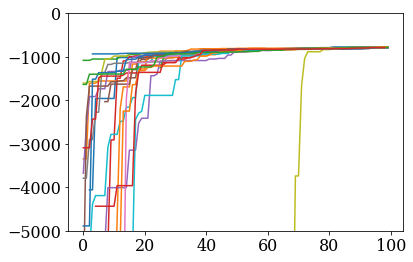

In [27]:
np.shape(prob)
for i in range(24):
    plt.plot(prob[i:-1:24])
plt.ylim(-5e3,0)

In [9]:
for i in range(0,len(flat_samples),24*10):
    θ = flat_samples[i]
    fig,ax1,ax2,ax3=plotParams(data,[θ],1)
    ax1.annotate("log_prob = {0:.2f}".format(log_prob(θ,data)),(-6e3,0.6))
    fig.savefig('tmpPlots/frame_{0:03d}'.format(int(i/(24*10)+1)))
    plt.close('all')

100.00 % complete

In [139]:
for i in range(len(samples[:,0,:])):
    θ = samples[i,0,:]
    fig,ax1,ax2,ax3=plotParams(data,[θ],1)
    ax1.annotate("log_prob = {0:.2f}".format(log_prob(θ,data)),(-6e3,0.6))
    fig.savefig('tmpPlots/frame_{0:03d}'.format(i+1))
    plt.close('all')

NameError: name 'samples' is not defined

In [10]:
import subprocess as s
def makeAnim(clean=True):
    s.run('ffmpeg -framerate 30 -i "tmpPlots/frame_%03d.png" -c:v libx264 -preset slow -coder 1 -movflags +faststart -g 15 -crf 18 -pix_fmt yuv420p -profile:v high -y -bf 2 "anim.mp4"',shell=True)
    if clean==True:
        print("cleaning up png files")
        s.run('rm tmpPlots/*',shell=True)
        
makeAnim()

cleaning up png files


In [12]:
print("i = {0:.2f}, rBar = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2) = {4:.2f}, f2 (cos^2) = {5:.2f}, f3 (sin*cos)= {6:.2f}, PA = {7:.2f}, scale = {8:.2f}, cenShift = {9:.5f}".format(θBest[0],θBest[1],θBest[2],θBest[3],θBest[4],θBest[5],θBest[6],θBest[7],θBest[8],θBest[9]))

i = 89.66, rBar = 7411.91, MFac = 0.22, rFac = 18.22, f1 (sin^2) = 0.02, f2 (cos^2) = 0.77, f3 (sin*cos)= 0.03, PA = 347.61, scale = 0.93, cenShift = 0.00047


0.00 % complete

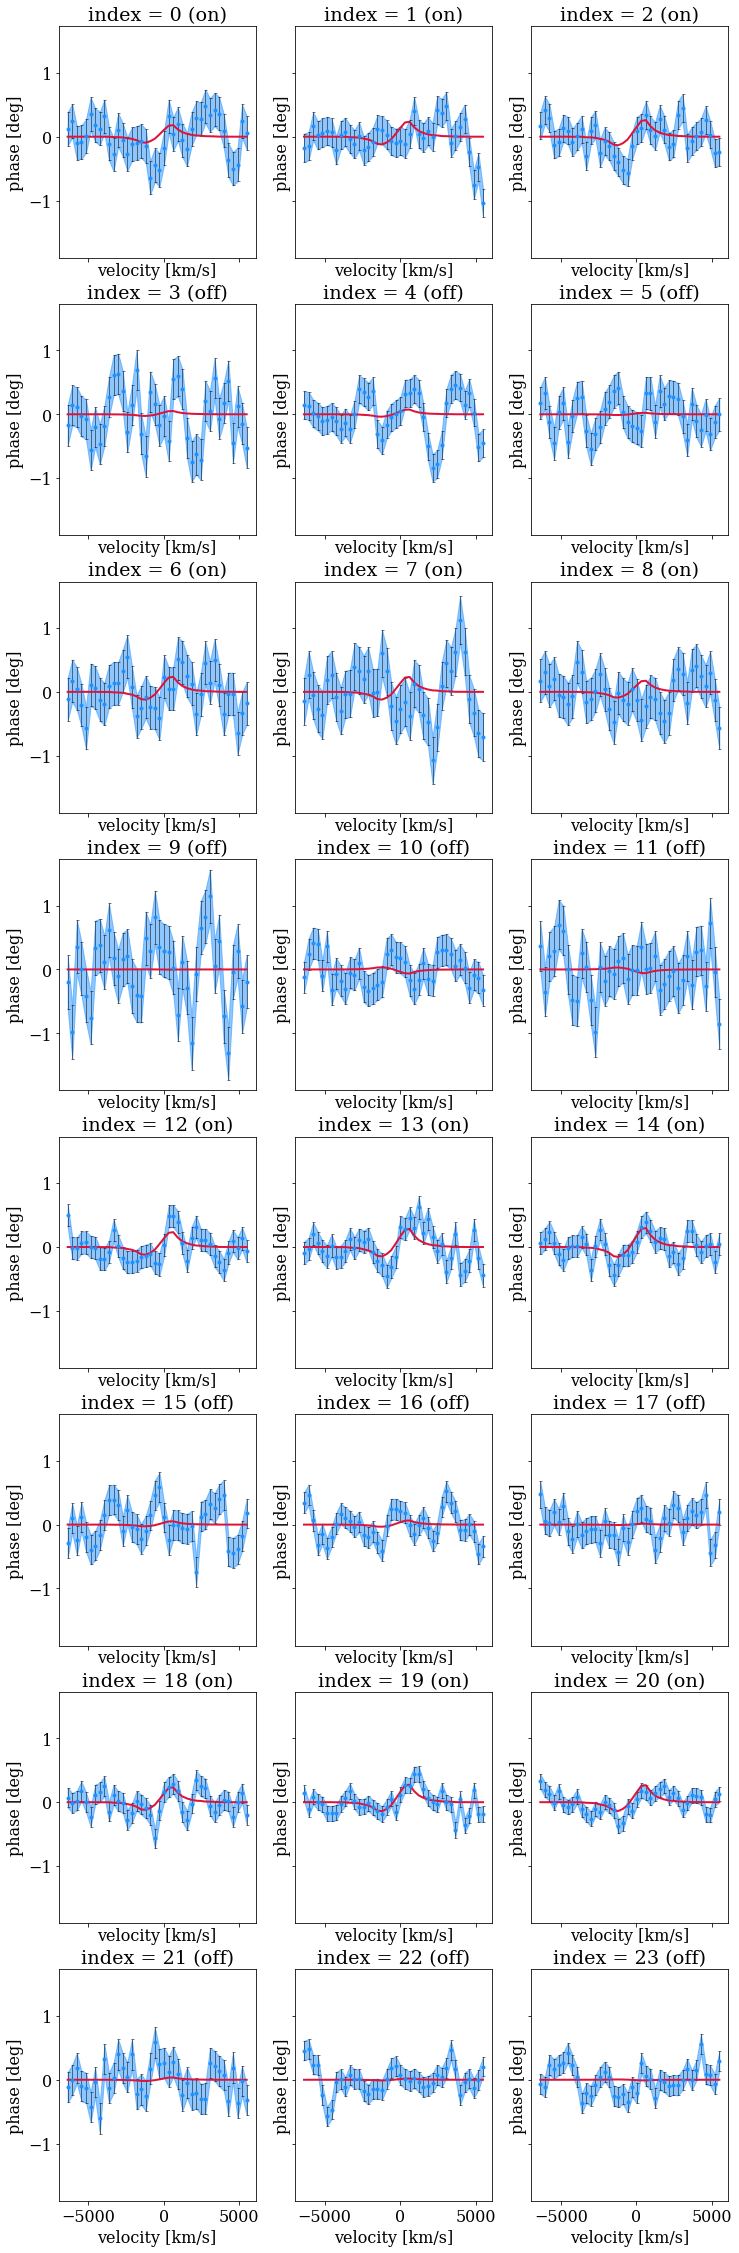

In [16]:
#theta computer (2k iterations, started near i = 30) i = 41.65, rBar = 3237.49, MFac = 0.56, rFac = 15.62, f1 (sin^2) = 0.47, f2 (cos^2) = 0.91, f3 (sin*cos)= 0.62, PA = 345.77, scale = 1.02, cenShift = 0.00048
plotPhases(data,[θBest],1);

In [20]:
vel,line,phaseList = getProfiles(θBest,data)
yLErr = data[6]
lnlikeLine = -0.5*numpy.sum(((data[3]-line)/yLErr)**2)
lnlikeLine

-35.55285149323332

In [15]:
def rBar(γ,rMin=710.14,rMax=3e4):
    num = (rMax**(γ-3/2)-rMin**(γ-3/2))*(1-1/(γ-3/2))
    den = rMax**(γ-5/2)-rMin**(γ-5/2) 
    return num/den
rBar(1,1e3,1.5e4)
def get_rMinMax(rBar,rFac,γ=1):
        rMin = rBar*(rFac**(γ-5/2)-1)/(rFac**(γ-3/2)-1)*(γ-3/2)/(γ-5/2)
        rMax = rMin*rFac
        return rMin,rMax
get_rMinMax(rBar(1,1e3,1.5e4),15)

(1000.0000000000001, 15000.000000000002)

In [13]:
blRange=θBest[2]*3e8*2e33*6.67e-8/9e20/548/3.09e24
print("rough size = {:.2f} μas".format(θBest[1]*blRange*2/4.85e-12))

rough size = 11.84 μas


In [13]:
def δrBar(rBar,γ,δrMin,rMin=710.14,rMax=3e4): #this is wrong
    pre = rBar*(1-1/(γ-3/2))
    t1 = (rMin**(γ-5/2))*(γ-3/2)*δrMin/(rMax**(γ-3/2)-rMin**(γ-3/2))
    t2 = (rMin**(γ-7/2))*(γ-5/2)*δrMin/(rMax**(γ-5/2)-rMin**(γ-5/2))
    return pre*np.sqrt(t1**2+t2**2)

In [16]:
mcmc = np.percentile(flat_samples[:,1], [16, 50, 84])
q = np.diff(mcmc) #get upper and lower bounds for rMin
lower = q[0]; upper = q[1]
δrBarU = δrBar(rBar(1),1,upper); δrBarL = δrBar(rBar(1),1,lower)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(rBar(1)*blRange/4.85e-12, δrBarL*blRange/4.85e-12, δrBarU*blRange/4.85e-12, "r bar")
display(Math(txt)) #super wrong

<IPython.core.display.Math object>